# Propósito

Este notebook tem como objetivo realizar uma análise exploratória de algumas colunas de interesse das medições dos sensores de qualidade do ar.

O principal objetivo será verificar a distribuição de cada coluna e determinar se elas seguem uma distribuição normal. Para isso, utilizaremos técnicas como o **Teste de Shapiro-Wilk** e o **Q-Q Plot**, que nos ajudarão a verificar a aderência à normalidade.

Em seguida, as colunas que não apresentarem uma distribuição normal serão transformadas utilizando técnicas como **Box-Cox** para aproximá-las de uma distribuição normal.

Por fim, geraremos gráficos de histograma para visualizar se as transformações resultaram em uma distribuição mais próxima da normalidade.

# Importações

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest

# Consumindo bases

In [2]:
url_sensor_bangu = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/NEW_TEST/Data/Sensores/Por_Estacao/CSV/bangu.csv'
url_sensor_campo_grande = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/NEW_TEST/Data/Sensores/Por_Estacao/CSV/campo_grande.csv'
url_sensor_pedra_guaratiba = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/NEW_TEST/Data/Sensores/Por_Estacao/CSV/pedra_guaratiba.csv'
url_sensor_iraja = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/NEW_TEST/Data/Sensores/Por_Estacao/CSV/iraja.csv'
url_sensor_tijuca = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/NEW_TEST/Data/Sensores/Por_Estacao/CSV/tijuca.csv'
url_sensor_sao_cristovao = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/NEW_TEST/Data/Sensores/Por_Estacao/CSV/sao_cristovao.csv'
url_sensor_copacabana = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/NEW_TEST/Data/Sensores/Por_Estacao/CSV/copacabana.csv'
url_sensor_centro = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/NEW_TEST/Data/Sensores/Por_Estacao/CSV/centro.csv'

df_sensor_bangu = pd.read_csv(url_sensor_bangu, sep=',')
df_sensor_campo_grande = pd.read_csv(url_sensor_campo_grande, sep=',')
df_sensor_pedra_guaratiba = pd.read_csv(url_sensor_pedra_guaratiba, sep=',')
df_sensor_iraja = pd.read_csv(url_sensor_iraja, sep=',')
df_sensor_tijuca = pd.read_csv(url_sensor_tijuca, sep=',')
df_sensor_sao_cristovao = pd.read_csv(url_sensor_sao_cristovao, sep=',')
df_sensor_copacabana = pd.read_csv(url_sensor_copacabana, sep=',')
df_sensor_centro = pd.read_csv(url_sensor_centro, sep=',')

# Concatenando dataframe das estações após o tratamento

In [3]:
df_sensor = pd.concat([df_sensor_bangu, df_sensor_campo_grande, df_sensor_pedra_guaratiba, df_sensor_iraja, df_sensor_tijuca, df_sensor_sao_cristovao, df_sensor_copacabana, df_sensor_centro])

df_sensor.reset_index(drop=True, inplace=True)

In [4]:
df_sensor

data_formatada estacao   ano  mes        lat        lon     chuva  \
0         2012-01-01   Bangu  2012    1 -22.887910 -43.471074  0.514286   
1         2012-01-02   Bangu  2012    1 -22.887910 -43.471074  2.658333   
2         2012-01-03   Bangu  2012    1 -22.887910 -43.471074  0.000000   
3         2012-01-04   Bangu  2012    1 -22.887910 -43.471074  0.016667   
4         2012-01-05   Bangu  2012    1 -22.887910 -43.471074  0.000000   
...              ...     ...   ...  ...        ...        ...       ...   
37995     2024-12-28  Centro  2024   12 -22.908344 -43.178152       NaN   
37996     2024-12-29  Centro  2024   12 -22.908344 -43.178152       NaN   
37997     2024-12-30  Centro  2024   12 -22.908344 -43.178152       NaN   
37998     2024-12-31  Centro  2024   12 -22.908344 -43.178152       NaN   
37999     2025-01-01  Centro  2025    1 -22.908344 -43.178152  0.000000   

            temp         ur        co         no        no2        nox  \
0      26.088095  89.140952  0.503810   2.617143  12.113333  14.729524   
1      22.874167  94.992500  0.234167   4.322083  11.511250  15.827500   
2      24.991250  76.596250  0.333958   6.184167  13.148750  19.332917   
3      26.350833  70.597917  0.403333  14.318750  28.951667  43.272083   
4      27.145000  71.039583  0.448750   7.699167  21.365417  29.065417   
...          ...        ...       ...        ...        ...        ...   
37995        NaN        NaN  0.360417        NaN        NaN        NaN   
37996        NaN        NaN  0.337083        NaN        NaN        NaN   
37997        NaN        NaN  0.276250        NaN        NaN        NaN   
37998        NaN        NaN  0.171667        NaN        NaN        NaN   
37999  24.750000  97.600000  0.216667        NaN        NaN        NaN   

            so2         o3       pm10  pm2_5   aqi classificacao  
0      0.541000  28.365238  21.785714    NaN  17.0      N1 - Boa  
1      0.312500  23.874583   5.708333    NaN  14.0      N1 - Boa  
2      0.598125  23.960000  16.916667    NaN  19.0      N1 - Boa  
3      0.775417  34.962292  40.166667    NaN  34.0      N1 - Boa  
4      0.337083  42.460000  32.583333    NaN  37.0      N1 - Boa  
...         ...        ...        ...    ...   ...           ...  
37995       NaN  39.473750        NaN    NaN  31.0      N1 - Boa  
37996       NaN  44.846667        NaN    NaN  25.0      N1 - Boa  
37997       NaN  37.235000        NaN    NaN  21.0      N1 - Boa  
37998       NaN  41.406250        NaN    NaN  22.0      N1 - Boa  
37999       NaN  25.006667  24.000000    NaN  19.0      N1 - Boa  

[38000 rows x 19 columns]

In [5]:
df_sensor.drop(columns=['estacao', 'ano', 'mes', 'classificacao', 'lat', 'lon'], inplace=True)

In [6]:
df_sensor = df_sensor.groupby('data_formatada').mean().reset_index()

In [7]:
# Classificação da qualidade do ar com base no AQI real
def classifica_qualidade(aqi):
    # Se aqi for vazio deve retornar 'N0 - Indifinido'
    if pd.isna(aqi):
        return 'N0 - Indifinido'
    elif aqi <= 40:
        return 'N1 - Boa'
    elif aqi <= 80:
        return 'N2 - Moderada'
    elif aqi <= 120:
        return 'N3 - Ruim'
    elif aqi <= 200:
        return 'N4 - Muito Ruim'
    else:
        return 'N5 - Péssima'

df_sensor['aqi'] = df_sensor['aqi'].round().astype('Int64')
df_sensor['classificacao'] = df_sensor['aqi'].apply(classifica_qualidade)

In [8]:
df_sensor['data_formatada'] = pd.to_datetime(df_sensor['data_formatada'])
df_sensor['ano'] = df_sensor['data_formatada'].dt.year
df_sensor['mes'] = df_sensor['data_formatada'].dt.month

In [9]:
# Reorder columns
new_order = ['data_formatada', 'ano', 'mes',
             'chuva', 'temp', 'ur', 'co', 'no', 'no2', 'nox', 'so2', 'o3', 'pm10', 'pm2_5',
             'aqi', 'classificacao']
df_sensor = df_sensor[new_order]

display(df_sensor)

data_formatada   ano  mes     chuva       temp         ur        co  \
0        2012-01-01  2012    1  0.557589  25.834464  92.164821  0.425585   
1        2012-01-02  2012    1  2.335417  22.836190  95.588571  0.305556   
2        2012-01-03  2012    1  0.001042  24.965036  76.025686  0.261122   
3        2012-01-04  2012    1  0.002083  26.006250  72.904115  0.274702   
4        2012-01-05  2012    1  0.000000  26.497979  75.514531  0.271310   
...             ...   ...  ...       ...        ...        ...       ...   
4745     2024-12-28  2024   12  0.343056  26.639083  89.246833  0.366875   
4746     2024-12-29  2024   12  0.001389  26.693667  89.915000  0.396354   
4747     2024-12-30  2024   12  0.155556  26.839074  86.513588  0.319583   
4748     2024-12-31  2024   12  0.000000  27.314861  79.893819  0.220208   
4749     2025-01-01  2025    1  0.000000  27.519583  81.792917  0.189048   

             no        no2        nox       so2         o3       pm10  \
0      3.613492  23.519841  27.129365  2.674562  23.059167  23.925170   
1     12.675208  27.160417  39.842083  1.793889  20.136369  13.872024   
2     17.175347  28.730486  45.882778  3.918646  15.744096  24.090673   
3     24.745417  40.337778  65.049444  3.123826  25.002630  35.773437   
4     16.643056  34.914028  51.558750  3.066076  33.646172  32.901042   
...         ...        ...        ...       ...        ...        ...   
4745   8.293194  23.157222  31.451806  7.412500  43.487530  15.899306   
4746   4.884722  15.585694  20.467500  5.072500  42.301637  17.909722   
4747  10.030833  21.506528  31.536389  6.508958  36.306696  18.708333   
4748   9.816250  19.995972  29.811111  5.058542  42.240357  25.350694   
4749   3.750833  25.473333  29.224167  4.665556  26.268333  28.833333   

          pm2_5  aqi classificacao  
0     14.619048   21      N1 - Boa  
1      5.083333   17      N1 - Boa  
2      4.208333   21      N1 - Boa  
3     15.729167   31      N1 - Boa  
4     10.916667   33      N1 - Boa  
...         ...  ...           ...  
4745   4.000000   30      N1 - Boa  
4746   3.541667   26      N1 - Boa  
4747   3.625000   23      N1 - Boa  
4748   8.500000   32      N1 - Boa  
4749   9.000000   23      N1 - Boa  

[4750 rows x 16 columns]

In [10]:
df_sensor.to_csv('rio_de_janeiro_sensores.csv', index=False)

# Análise Exploratória de cada coluna e aplicação do Boxcox

## Chuva

### Análise exploratória

In [10]:
#@title Describe dos dados

df_sensor['chuva'].describe()

count    4727.000000
mean        0.163264
std         0.972300
min         0.000000
25%         0.000000
50%         0.002381
75%         0.089345
max        34.797604
Name: chuva, dtype: float64

### Visualização gráfica

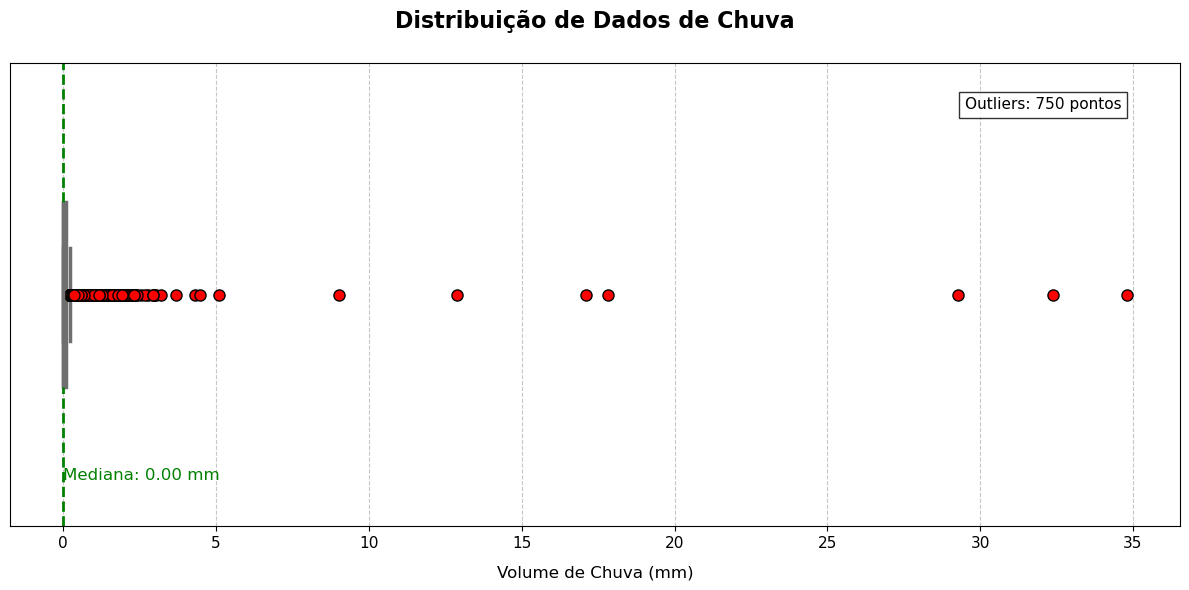

In [11]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['chuva'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Chuva\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Volume de Chuva (mm)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['chuva'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} mm',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['chuva'].quantile(0.25)
q3 = df_sensor['chuva'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['chuva'] < q1 - 1.5*iqr) |
                            (df_sensor['chuva'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


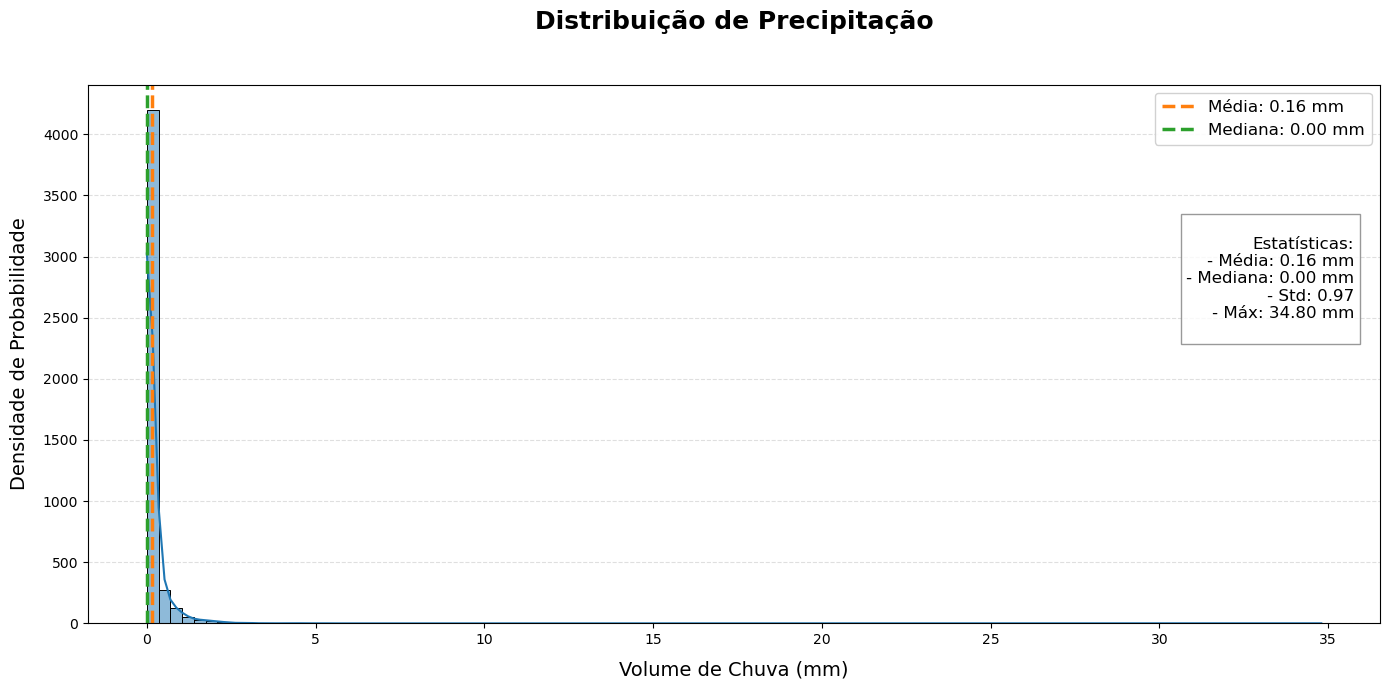

In [12]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='chuva',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Precipitação\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Volume de Chuva (mm)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['chuva'].mean()
median_val = df_sensor['chuva'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} mm')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} mm')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} mm
- Mediana: {median_val:.2f} mm
- Std: {df_sensor["chuva"].std():.2f}
- Máx: {df_sensor["chuva"].max():.2f} mm
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [13]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['chuva'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'chuva'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'chuva'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'chuva'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para chuva: Estatística = 0.188, p-valor = 0.000
chuva NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 0.0


In [14]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.407, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 2.217276499375283e-150


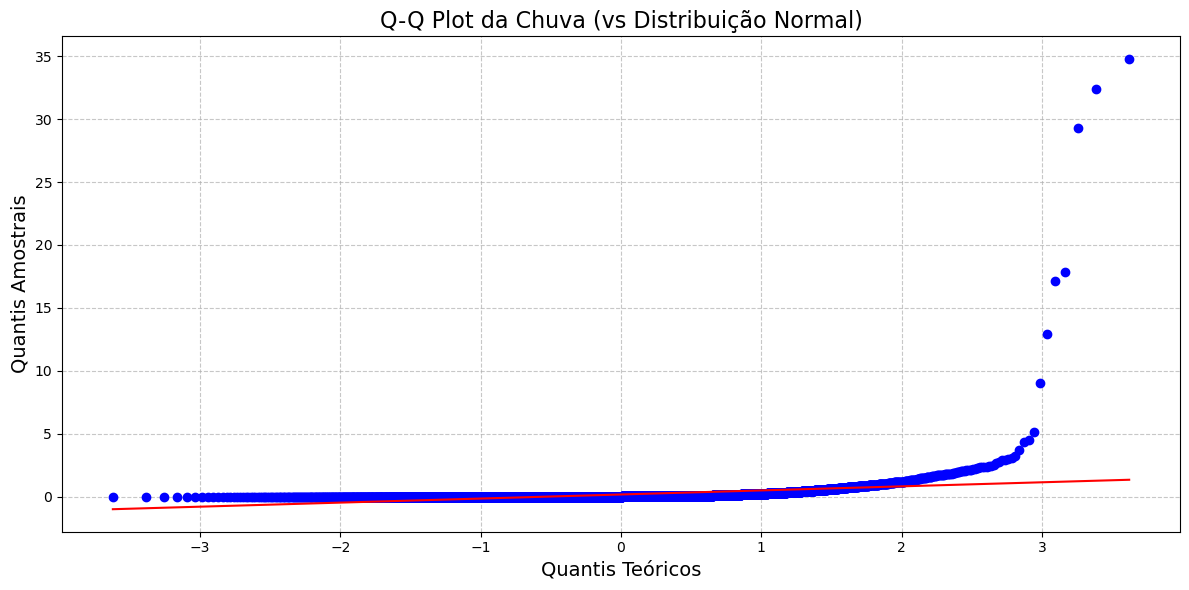

In [15]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['chuva'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Chuva (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Dados Não Normais:**

O desvio sistemático da linha, principalmente nas caudas, confirma o resultado do teste de Shapiro-Wilk (p-valor = 0.000).

Isso é típico em dados de chuva, que frequentemente têm:

- Assimetria positiva: Muitos valores baixos/zeros e alguns extremamente altos.

- Caudas pesadas: Valores de precipitação extrema que não são compatíveis com uma distribuição normal.

**Padrão de Desvio:**

Se os pontos ficam abaixo da linha no lado esquerdo e acima no lado direito, isso sugere assimetria positiva (comum em dados de chuva).

Se o gráfico mostrar uma curva em "S" ou formas não lineares, indica caudas mais pesadas ou mais leves que o esperado na normal.

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [17]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['chuva_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['chuva'].notna()
# chuva_validos = df_sensor.loc[mask, 'chuva']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'chuva_boxcox'] = boxcox1p(chuva_validos, lambda_boxcox)

In [16]:
df_sensor['chuva_boxcox'] = np.nan

mask = (df_sensor['chuva'].notna())

chuva_validos = df_sensor.loc[mask, 'chuva']

chuva_boxcox, lambda_boxcox = stats.boxcox(chuva_validos + 1)

df_sensor.loc[mask, 'chuva_boxcox'] = chuva_boxcox

### Testes de normalidade após Boxcox



In [17]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['chuva_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'chuva'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'chuva'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'chuva'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para chuva: Estatística = 0.717, p-valor = 0.000
chuva NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 4.961880153103174e-38


In [18]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.267, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 2.519511784634815e-63


c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


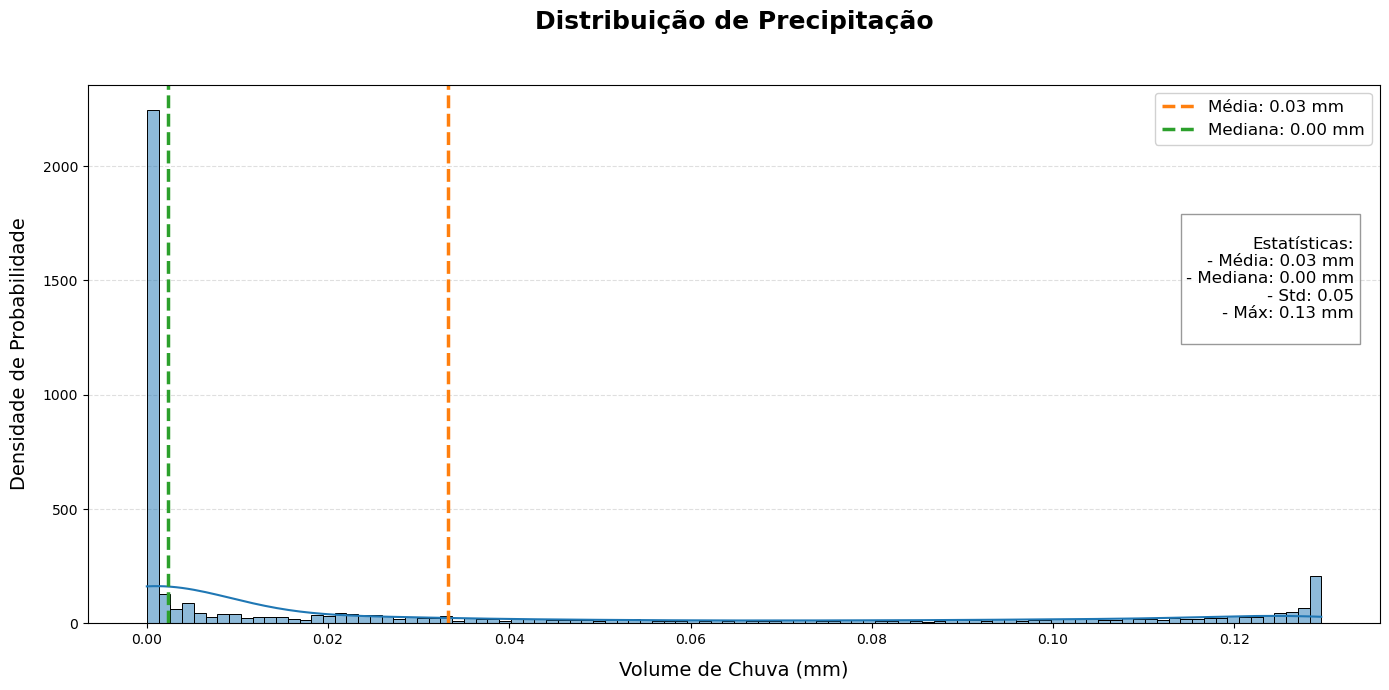

In [19]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='chuva_boxcox',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Precipitação\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Volume de Chuva (mm)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['chuva_boxcox'].mean()
median_val = df_sensor['chuva_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} mm')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} mm')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} mm
- Mediana: {median_val:.2f} mm
- Std: {df_sensor["chuva_boxcox"].std():.2f}
- Máx: {df_sensor["chuva_boxcox"].max():.2f} mm
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

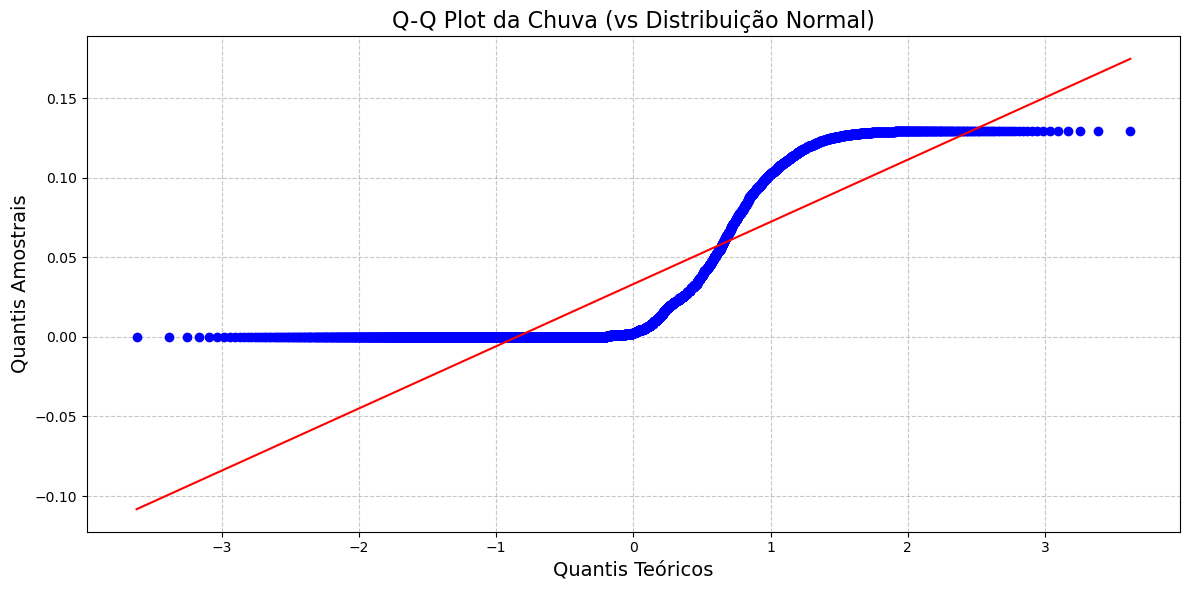

In [20]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['chuva_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Chuva (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna Chuva

In [21]:
#@title Dropando colunas chuva e renomeando 'chuva_boxcox' para chuva

df_sensor.drop(columns=['chuva'], inplace=True)
df_sensor.rename(columns={'chuva_boxcox': 'chuva'}, inplace=True)

## Temperatura

### Análise exploratória

In [22]:
#@title Describe dos dados

df_sensor['temp'].describe()

count    4726.000000
mean       26.008242
std         3.360453
min        15.930375
25%        23.601997
50%        25.924119
75%        28.432072
max        35.547240
Name: temp, dtype: float64

In [23]:
#@title Segundo G1 a menor temperatura do Rio foi 8.1 em 2011
# https://g1.globo.com/rj/rio-de-janeiro/noticia/2024/08/13/rio-bate-recorde-de-frio-do-ano.ghtml

def fill_temp_values(df_sensor):
    df_temp_errada = df_sensor[df_sensor['temp'] < 8.1]
    for index, row in df_temp_errada.iterrows():
        data_formatada = row['data_formatada']
        estacao = row['nome_estacao']
        df_sensor.loc[index, 'temp'] = df_sensor[(df_sensor['data_formatada'] == data_formatada) & (df_sensor['nome_estacao'] == estacao)]['temp'].mean()

    return df_sensor


df_sensor = fill_temp_values(df_sensor)

### Visualização gráfica

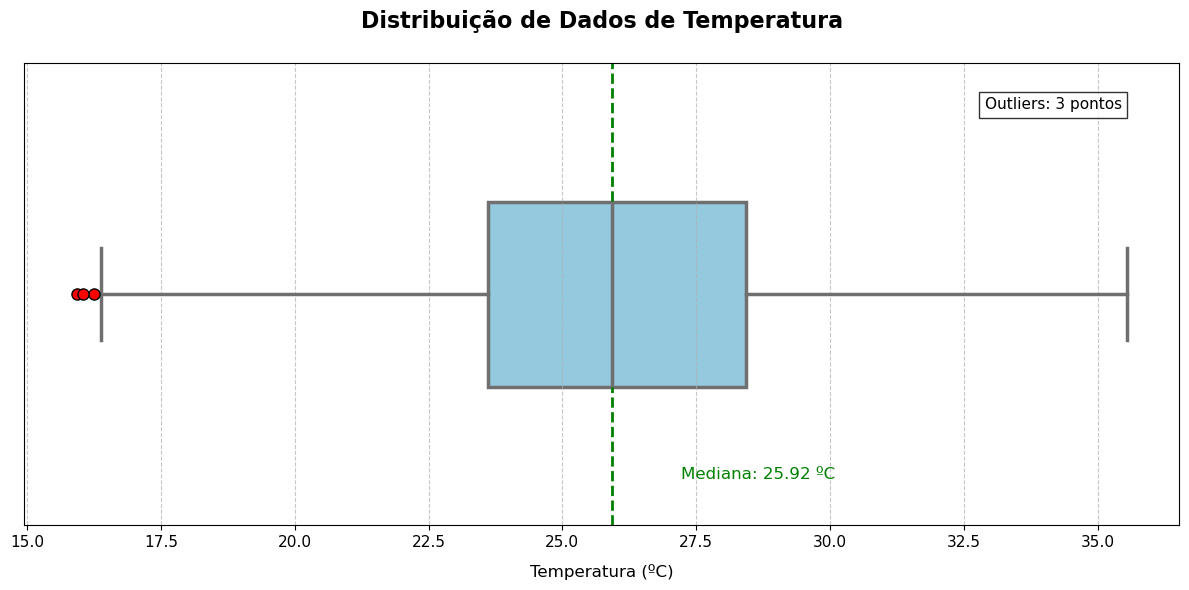

In [24]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['temp'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Temperatura\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Temperatura (ºC)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['temp'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} ºC',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['temp'].quantile(0.25)
q3 = df_sensor['temp'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['temp'] < q1 - 1.5*iqr) |
                            (df_sensor['temp'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


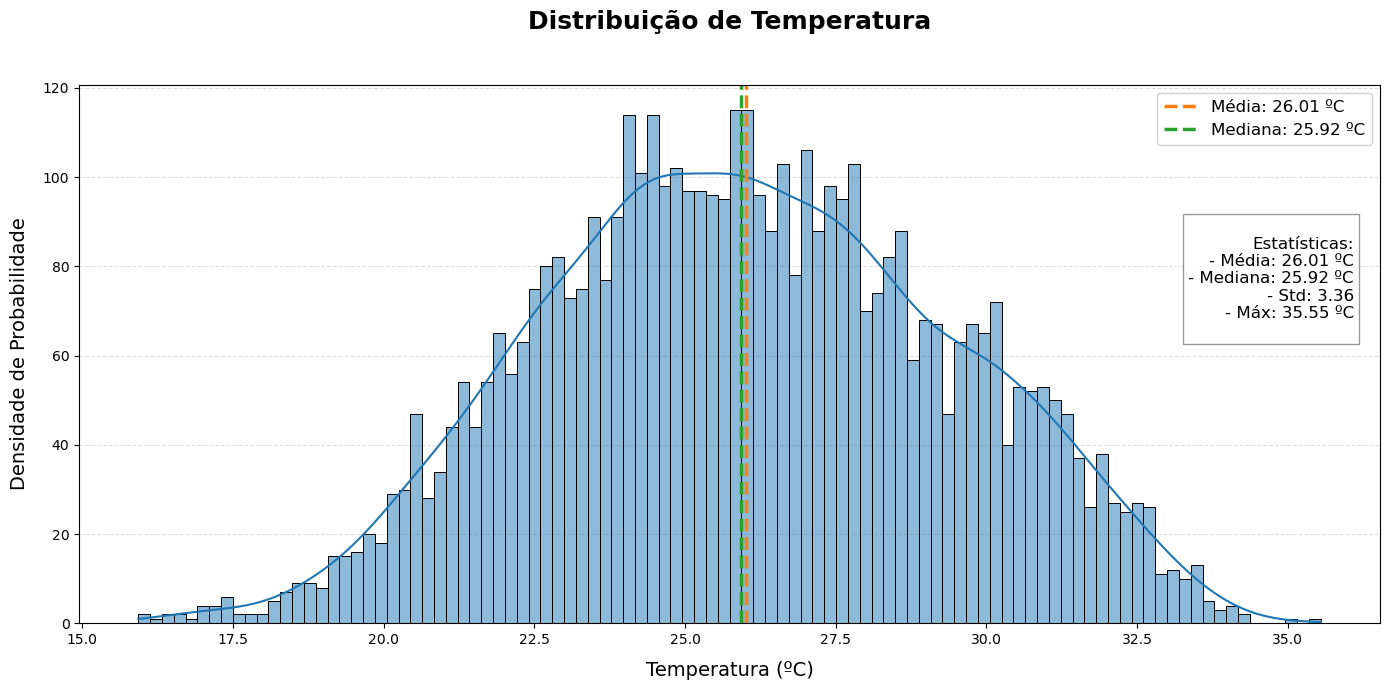

In [25]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='temp',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Temperatura\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Temperatura (ºC)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['temp'].mean()
median_val = df_sensor['temp'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} ºC')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} ºC')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} ºC
- Mediana: {median_val:.2f} ºC
- Std: {df_sensor["temp"].std():.2f}
- Máx: {df_sensor["temp"].max():.2f} ºC
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [26]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['temp'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'temp'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'temp'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'temp'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para temp: Estatística = 0.996, p-valor = 0.006
temp NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 0.006308529991656542


In [27]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.026, p-valor = 0.498
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.4975278334696731


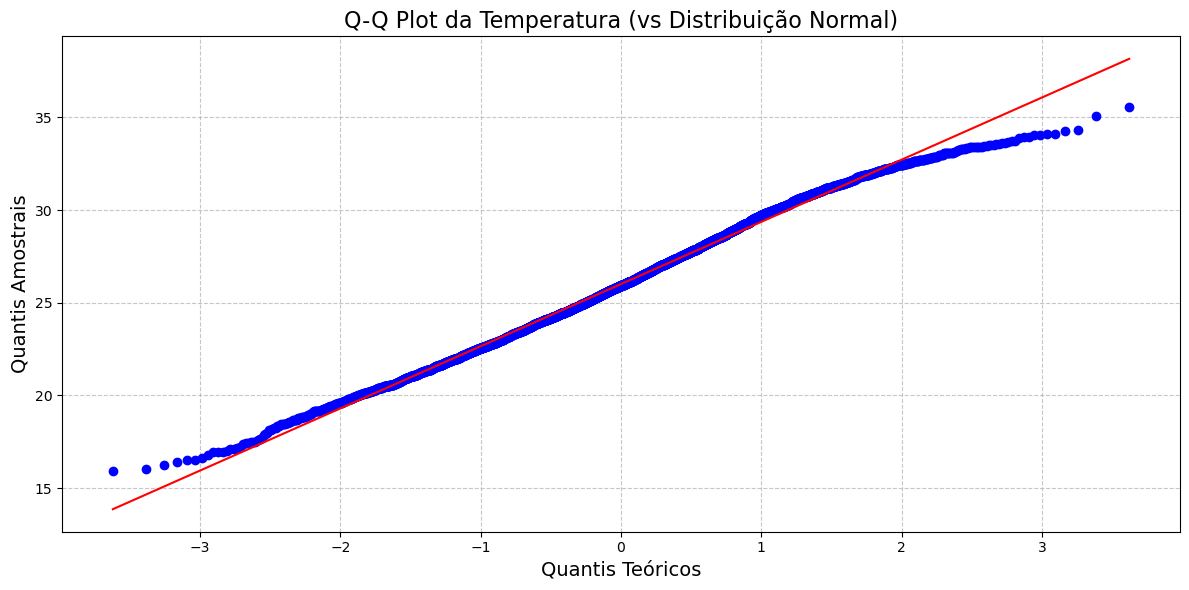

In [28]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['temp'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Temperatura (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [31]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['temp_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['temp'].notna()
# temp_validos = df_sensor.loc[mask, 'temp']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'temp_boxcox'] = boxcox1p(temp_validos, lambda_boxcox)

In [29]:
df_sensor['temp_boxcox'] = np.nan

mask = (df_sensor['temp'].notna())

temp_validos = df_sensor.loc[mask, 'temp']

temp_boxcox, lambda_boxcox = stats.boxcox(temp_validos + 1)

df_sensor.loc[mask, 'temp_boxcox'] = temp_boxcox

### Testes de normalidade após Boxcox



In [30]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['temp_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'temp'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'temp'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'temp'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para temp: Estatística = 0.996, p-valor = 0.008
temp NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 0.008394431322813034


In [31]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.026, p-valor = 0.505
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.5047123929509771


c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


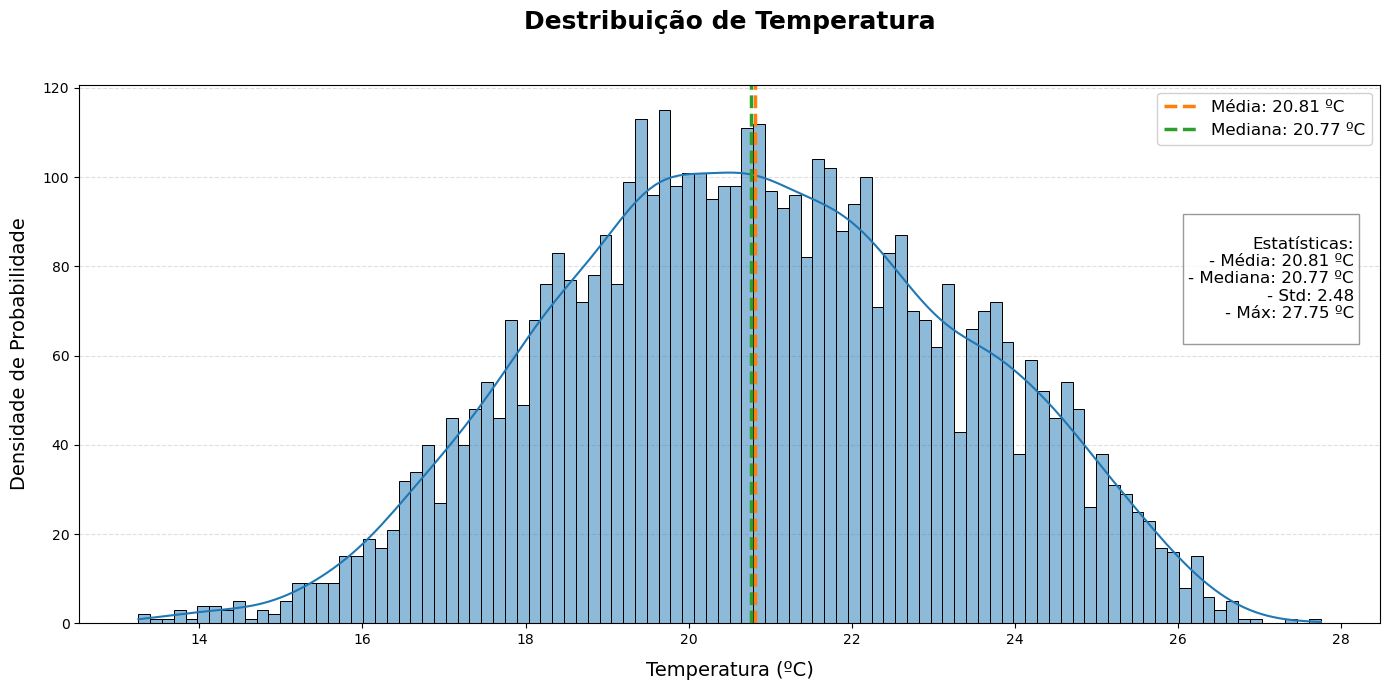

In [32]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='temp_boxcox',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Destribuição de Temperatura\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Temperatura (ºC)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['temp_boxcox'].mean()
median_val = df_sensor['temp_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} ºC')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} ºC')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} ºC
- Mediana: {median_val:.2f} ºC
- Std: {df_sensor["temp_boxcox"].std():.2f}
- Máx: {df_sensor["temp_boxcox"].max():.2f} ºC
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

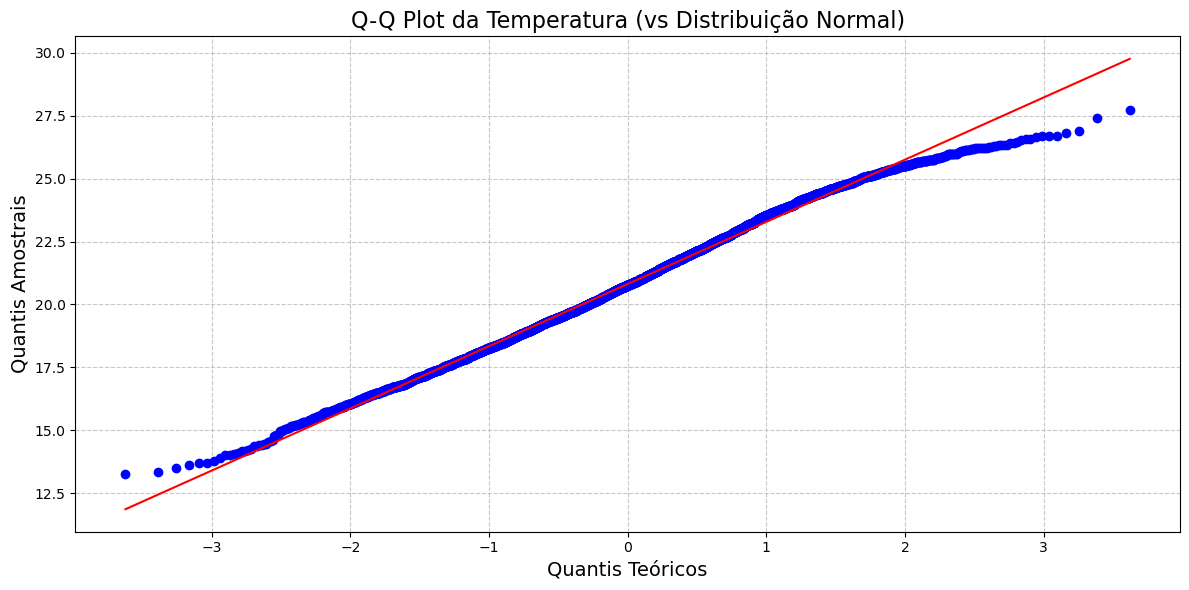

In [33]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['temp_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Temperatura (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna Chuva

In [34]:
#@title Dropando colunas temp e renomeando 'temp_boxcox' para temp

df_sensor.drop(columns=['temp'], inplace=True)
df_sensor.rename(columns={'temp_boxcox': 'temp'}, inplace=True)

## Umidade Relativa do Ar

### Análise exploratória

In [35]:
#@title Describe dos dados

df_sensor['ur'].describe()

count    4726.000000
mean       71.594631
std        10.727872
min        31.163611
25%        64.648107
50%        71.686362
75%        78.497592
max        98.896071
Name: ur, dtype: float64

In [36]:
#@title Segundo CNN a menor umidade relativa do Rio foi 10.3 em 2024
# https://www.cnnbrasil.com.br/nacional/rio-tem-calor-de-41-graus-e-pouca-umidade-relativa-do-ar/

def fill_ur_values(df_sensor):
    df_ur_errada = df_sensor[df_sensor['ur'] < 10.3]
    for index, row in df_ur_errada.iterrows():
        data_formatada = row['data_formatada']
        estacao = row['nome_estacao']
        df_sensor.loc[index, 'ur'] = df_sensor[(df_sensor['data_formatada'] == data_formatada) & (df_sensor['nome_estacao'] == estacao)]['ur'].mean()

    return df_sensor


df_sensor = fill_ur_values(df_sensor)

### Visualização gráfica

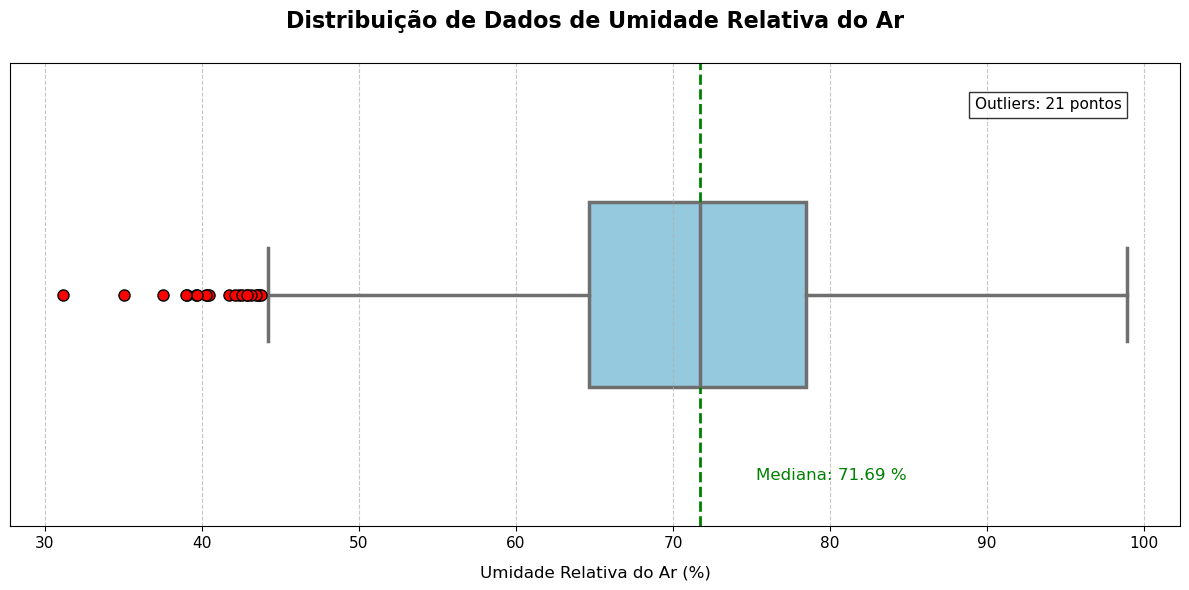

In [37]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['ur'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Umidade Relativa do Ar\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Umidade Relativa do Ar (%)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['ur'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} %',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['ur'].quantile(0.25)
q3 = df_sensor['ur'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['ur'] < q1 - 1.5*iqr) |
                            (df_sensor['ur'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


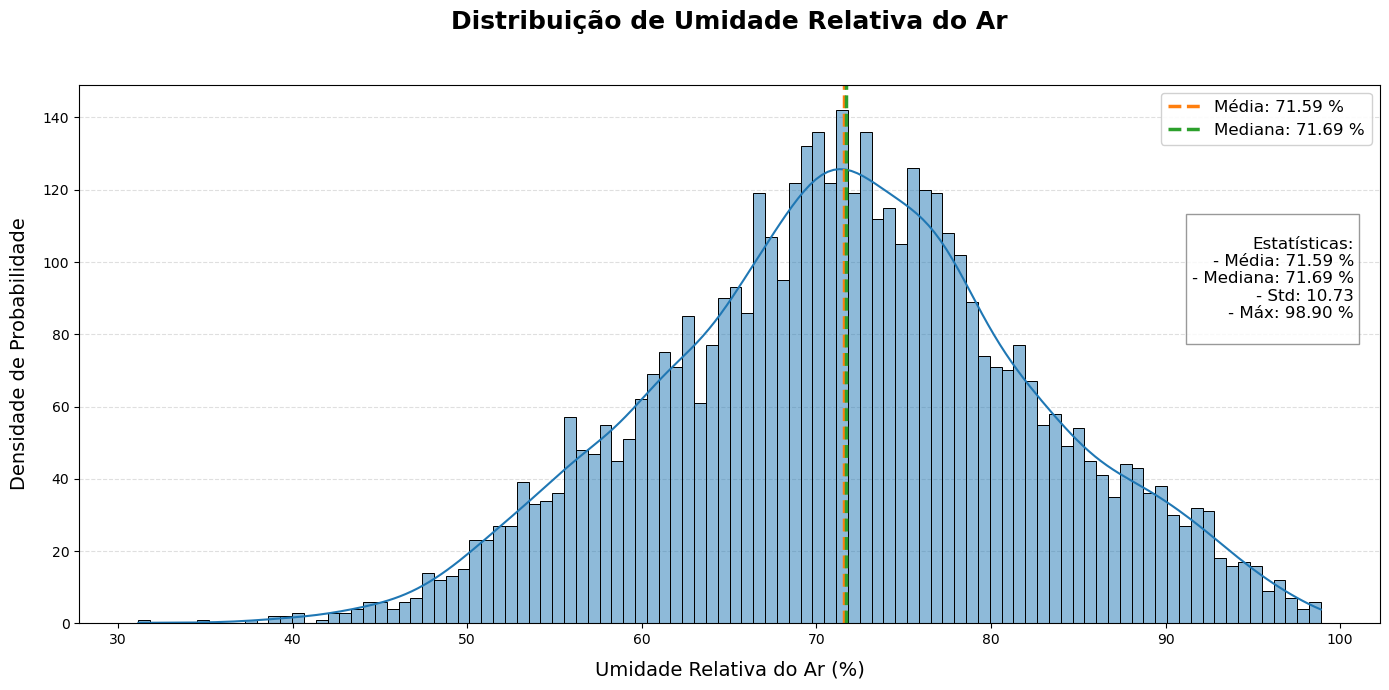

In [38]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='ur',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Umidade Relativa do Ar\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Umidade Relativa do Ar (%)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['ur'].mean()
median_val = df_sensor['ur'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} %')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} %')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} %
- Mediana: {median_val:.2f} %
- Std: {df_sensor["ur"].std():.2f}
- Máx: {df_sensor["ur"].max():.2f} %
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [39]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['ur'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'ur'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'ur'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'ur'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para ur: Estatística = 0.994, p-valor = 0.000
ur NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 0.0002910502953454852


In [40]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.037, p-valor = 0.133
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.13306190352956793


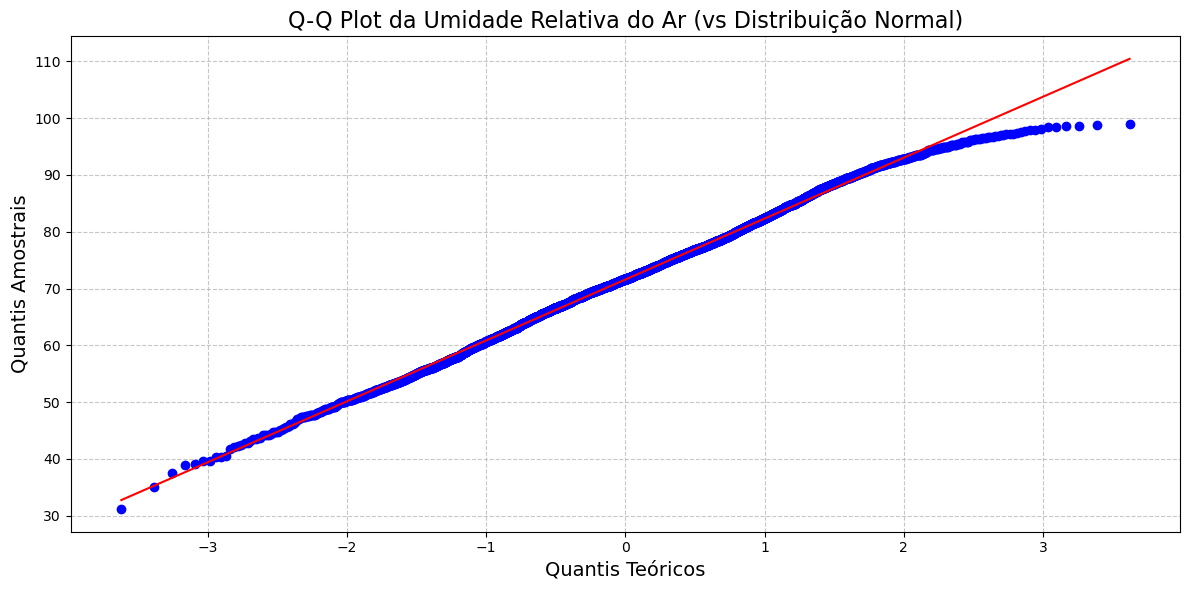

In [41]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['ur'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Umidade Relativa do Ar (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [42]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['ur_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['ur'].notna()
# ur_validos = df_sensor.loc[mask, 'ur']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'ur_boxcox'] = boxcox1p(ur_validos, lambda_boxcox)

In [43]:
df_sensor['ur_boxcox'] = np.nan

mask = (df_sensor['ur'].notna())

ur_validos = df_sensor.loc[mask, 'ur']

ur_boxcox, lambda_boxcox = stats.boxcox(ur_validos + 1)

df_sensor.loc[mask, 'ur_boxcox'] = ur_boxcox

### Testes de normalidade após Boxcox



In [44]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['ur_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'ur'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'ur'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'ur'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para ur: Estatística = 0.994, p-valor = 0.000
ur NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 0.0004910280113108456


In [45]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.033, p-valor = 0.230
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.22980620686024844


c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


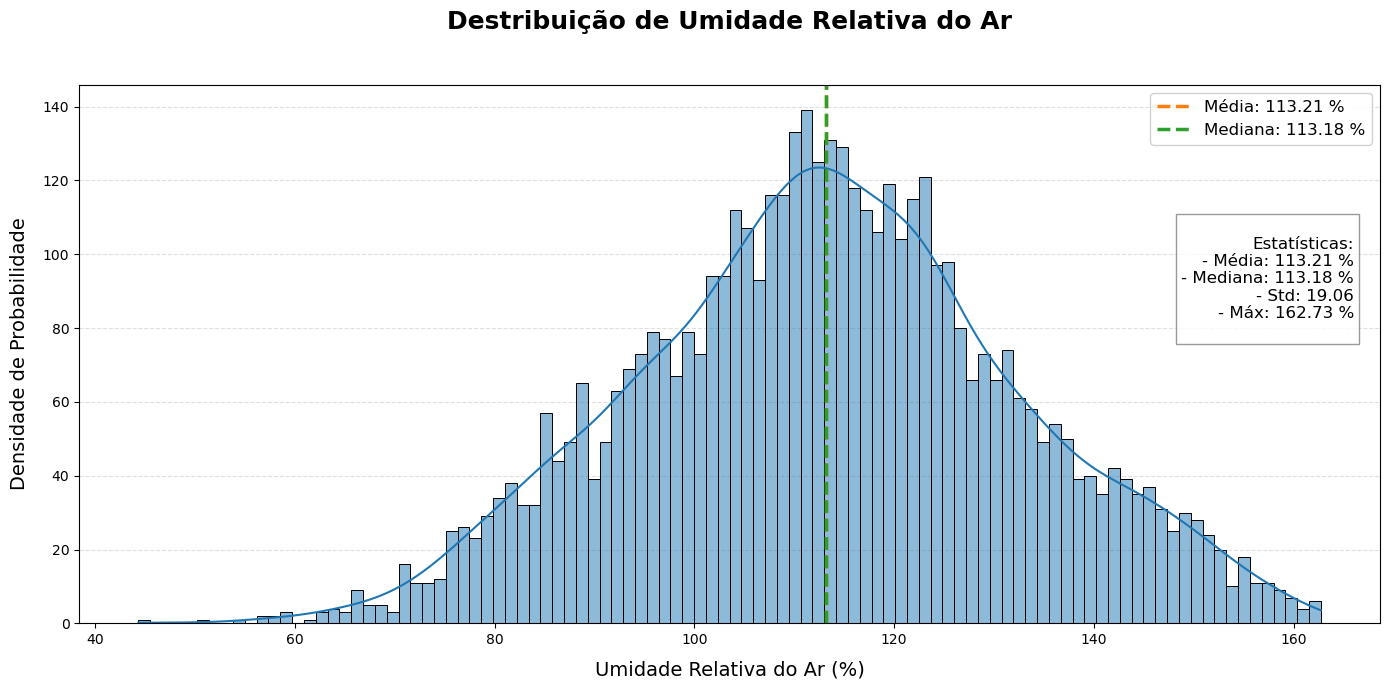

In [46]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='ur_boxcox',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Destribuição de Umidade Relativa do Ar\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Umidade Relativa do Ar (%)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['ur_boxcox'].mean()
median_val = df_sensor['ur_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} %')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} %')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} %
- Mediana: {median_val:.2f} %
- Std: {df_sensor["ur_boxcox"].std():.2f}
- Máx: {df_sensor["ur_boxcox"].max():.2f} %
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

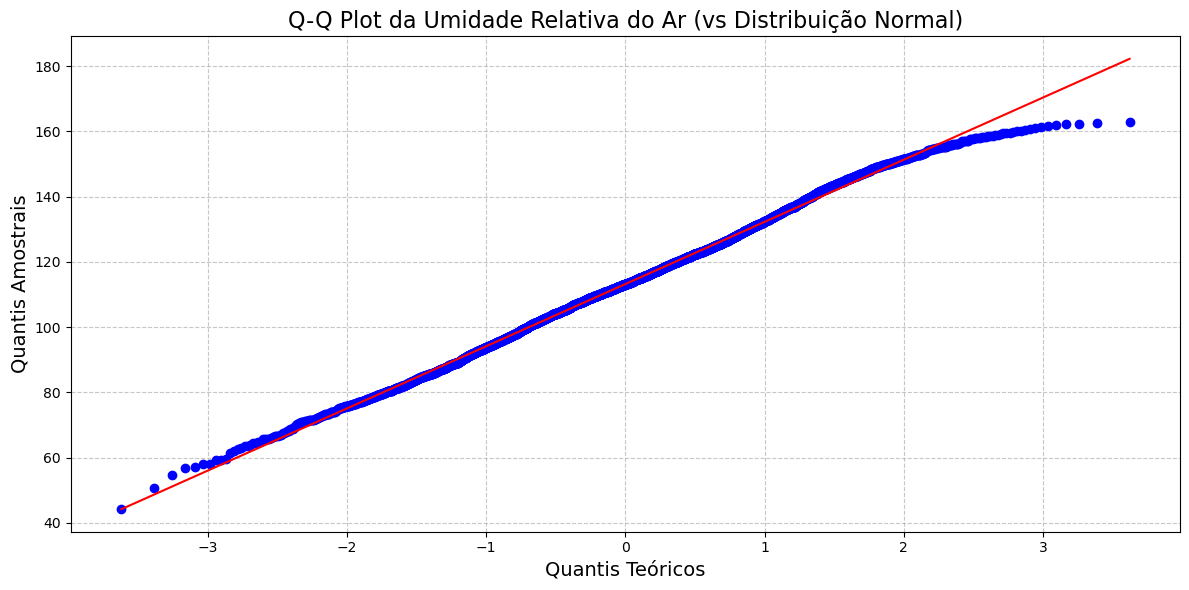

In [47]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['ur_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Umidade Relativa do Ar (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna ur

In [48]:
#@title Dropando colunas ur e renomeando 'ur_boxcox' para ur

df_sensor.drop(columns=['ur'], inplace=True)
df_sensor.rename(columns={'ur_boxcox': 'ur'}, inplace=True)

## Monóxido de Carbono

### Análise exploratória

In [49]:
#@title Describe dos dados

df_sensor['co'].describe()

count    4724.000000
mean        0.360139
std         0.134225
min         0.081132
25%         0.268750
50%         0.338286
75%         0.417708
max         1.475417
Name: co, dtype: float64

### Visualização gráfica

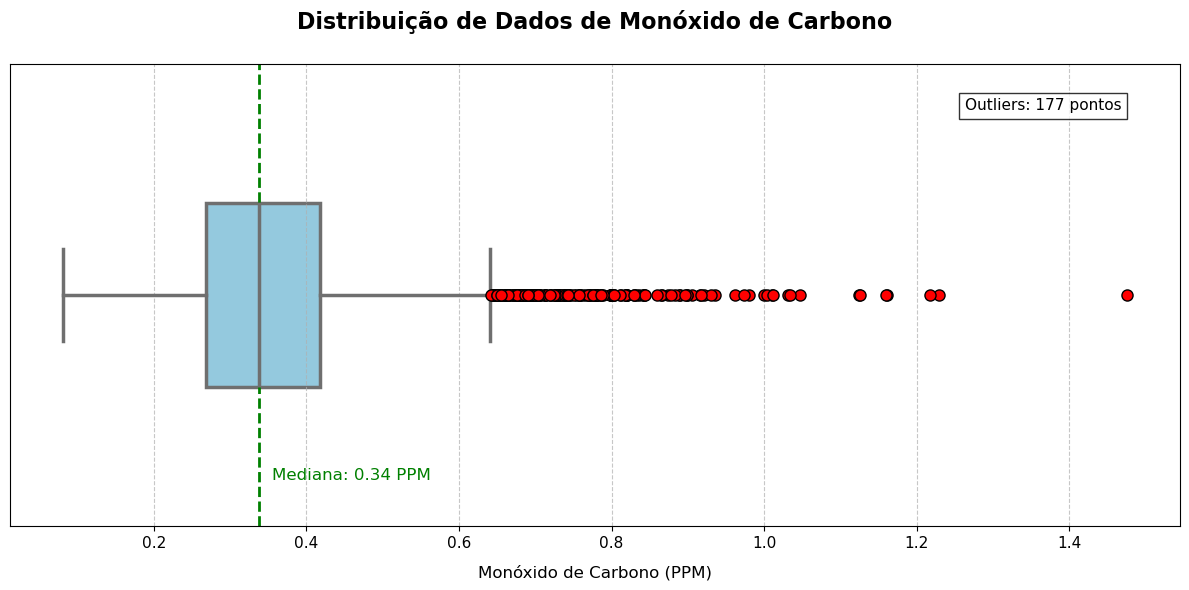

In [50]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['co'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Monóxido de Carbono\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Monóxido de Carbono (PPM)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['co'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} PPM',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['co'].quantile(0.25)
q3 = df_sensor['co'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['co'] < q1 - 1.5*iqr) |
                            (df_sensor['co'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


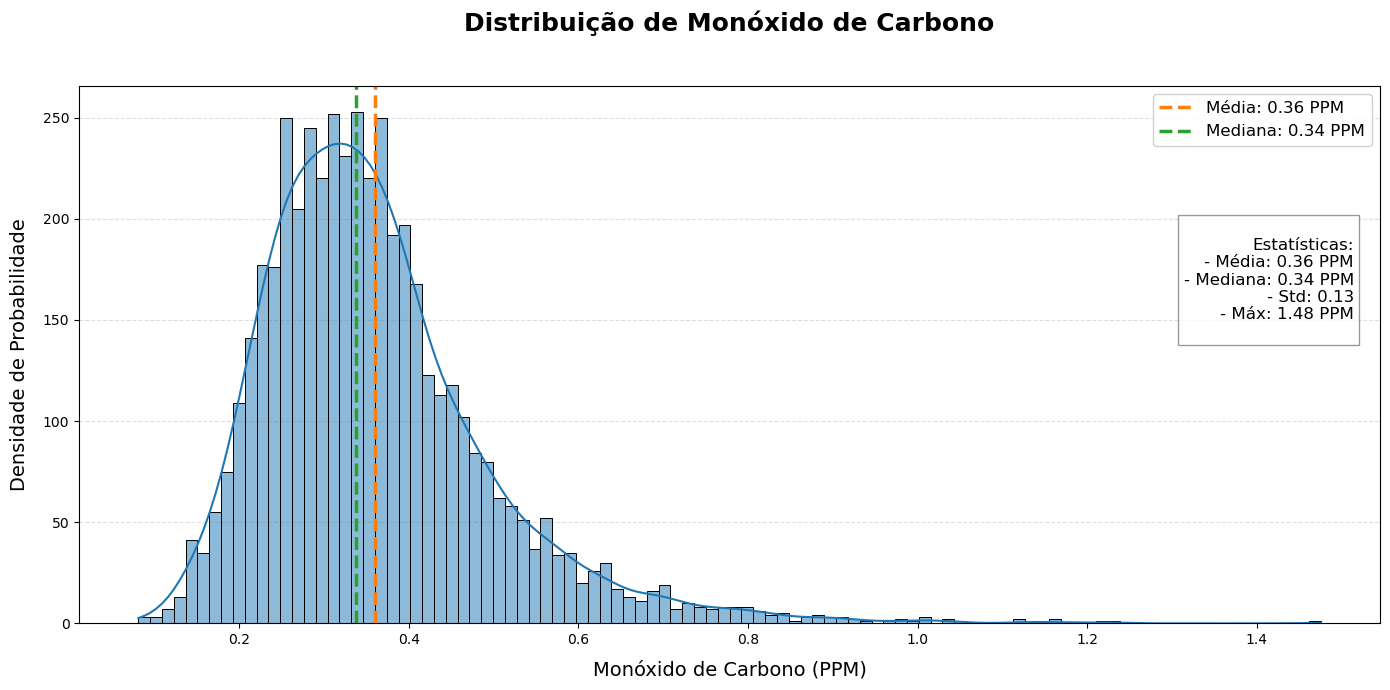

In [51]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='co',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Monóxido de Carbono\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Monóxido de Carbono (PPM)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['co'].mean()
median_val = df_sensor['co'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} PPM')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} PPM')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} PPM
- Mediana: {median_val:.2f} PPM
- Std: {df_sensor['co'].std():.2f}
- Máx: {df_sensor['co'].max():.2f} PPM
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [52]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['co'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'co'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'co'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'co'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para co: Estatística = 0.930, p-valor = 0.000
co NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 2.9278603041972103e-21


In [53]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.088, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 3.007029280404208e-07


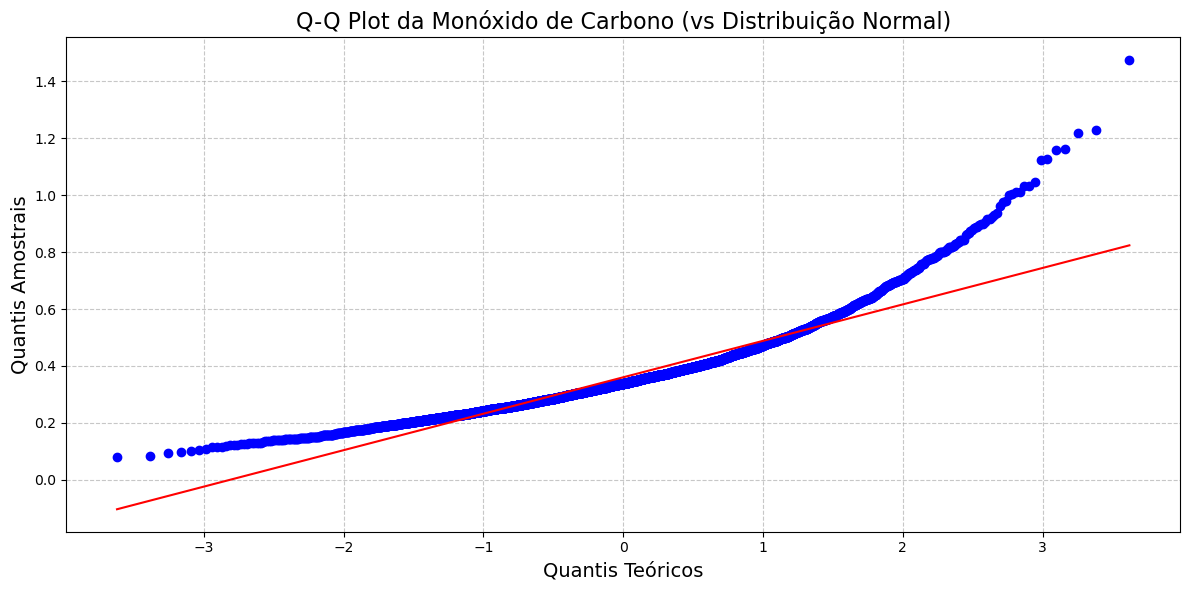

In [54]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['co'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Monóxido de Carbono (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [55]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [56]:
df_sensor['co_boxcox'] = np.nan

mask = (df_sensor['co'].notna())

co_validos = df_sensor.loc[mask, 'co']

co_boxcox, lambda_boxcox = stats.boxcox(co_validos + 1)

df_sensor.loc[mask, 'co_boxcox'] = co_boxcox

### Testes de normalidade após Boxcox



In [57]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['co_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'co'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'co'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'co'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para co: Estatística = 0.997, p-valor = 0.053
co parece seguir uma distribuição normal (p > 0.05).
p_value gerado: 0.05300641432404518


In [58]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.020, p-valor = 0.789
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.7894584478715502


c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


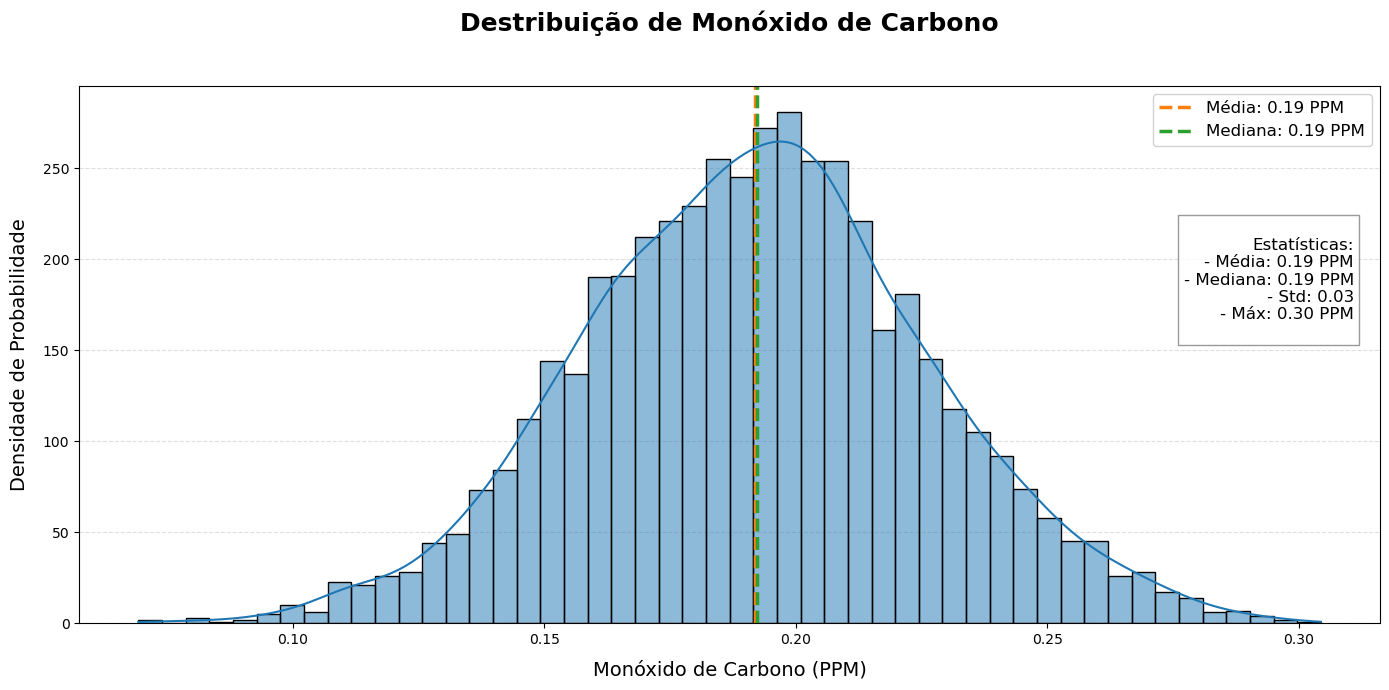

In [59]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='co_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de Monóxido de Carbono\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Monóxido de Carbono (PPM)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['co_boxcox'].mean()
median_val = df_sensor['co_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} PPM')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} PPM')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} PPM
- Mediana: {median_val:.2f} PPM
- Std: {df_sensor["co_boxcox"].std():.2f}
- Máx: {df_sensor["co_boxcox"].max():.2f} PPM
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

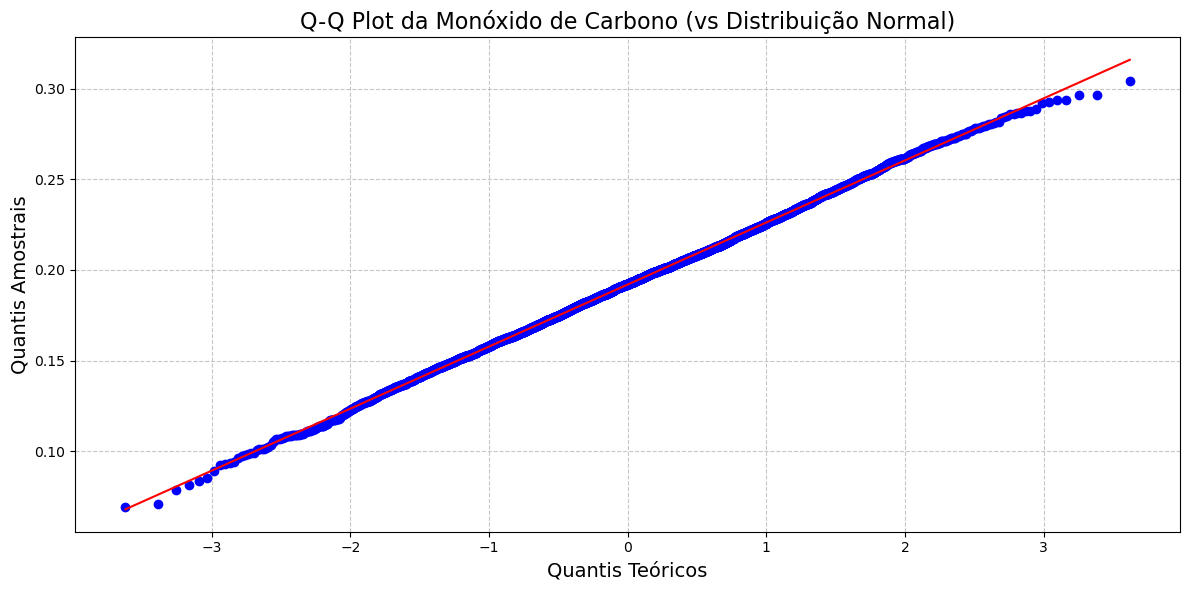

In [60]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['co_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Monóxido de Carbono (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna ur

In [61]:
#@title Dropando colunas co e renomeando 'co_boxcox' para co

df_sensor.drop(columns=['co'], inplace=True)
df_sensor.rename(columns={'co_boxcox': 'co'}, inplace=True)

## Monóxido de Nitrogênio

### Análise exploratória

In [62]:
#@title Describe dos dados

df_sensor['no'].describe()

count    4726.000000
mean       13.954633
std        10.163221
min         1.643125
25%         7.268711
50%        11.030972
75%        17.042747
max        78.615052
Name: no, dtype: float64

### Visualização gráfica

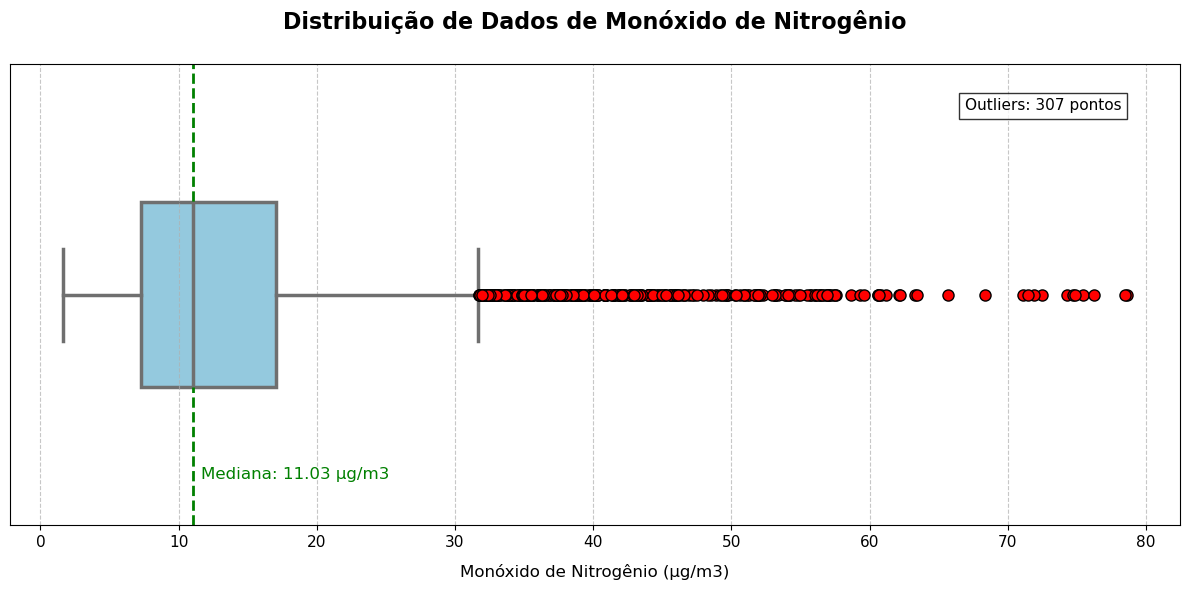

In [63]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['no'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Monóxido de Nitrogênio\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Monóxido de Nitrogênio (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['no'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['no'].quantile(0.25)
q3 = df_sensor['no'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['no'] < q1 - 1.5*iqr) |
                            (df_sensor['no'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


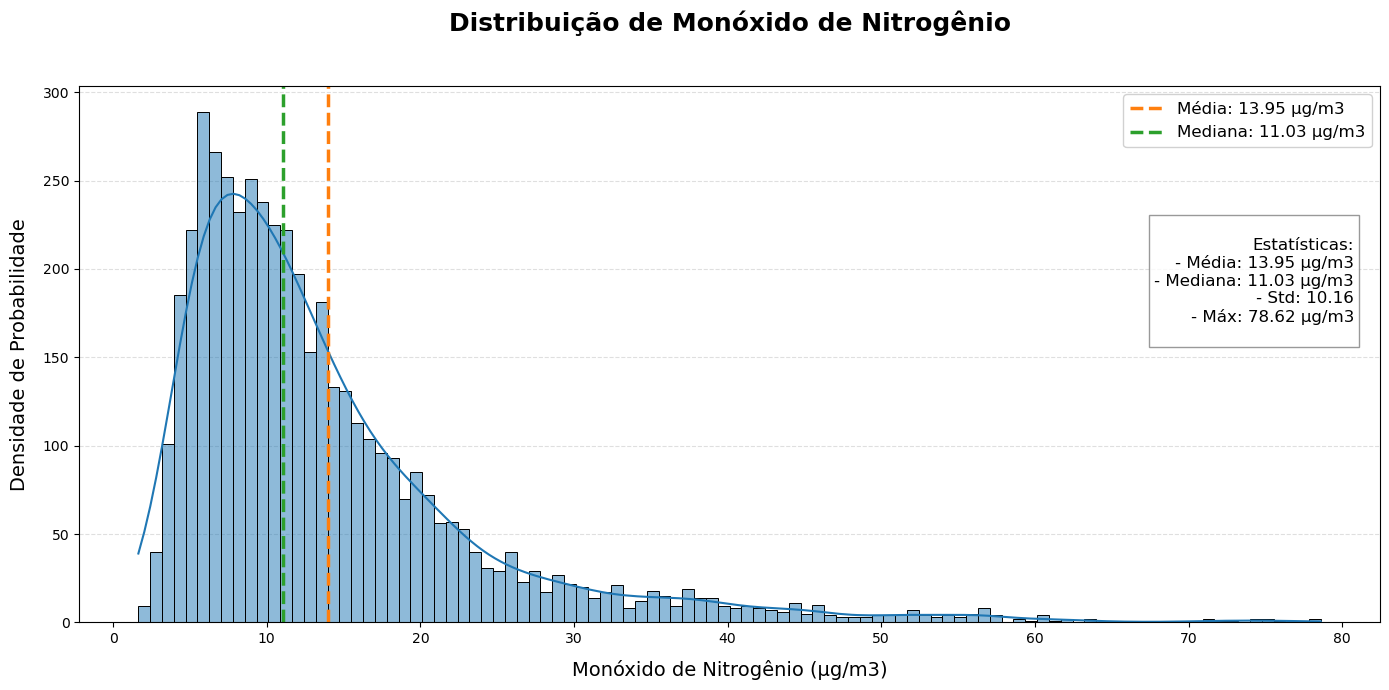

In [64]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='no',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Monóxido de Nitrogênio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Monóxido de Nitrogênio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['no'].mean()
median_val = df_sensor['no'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['no'].std():.2f}
- Máx: {df_sensor['no'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [65]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['no'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'no'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'no'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'no'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para no: Estatística = 0.786, p-valor = 0.000
no NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 3.1885658495701392e-34


In [66]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.156, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 1.2143005569816843e-21


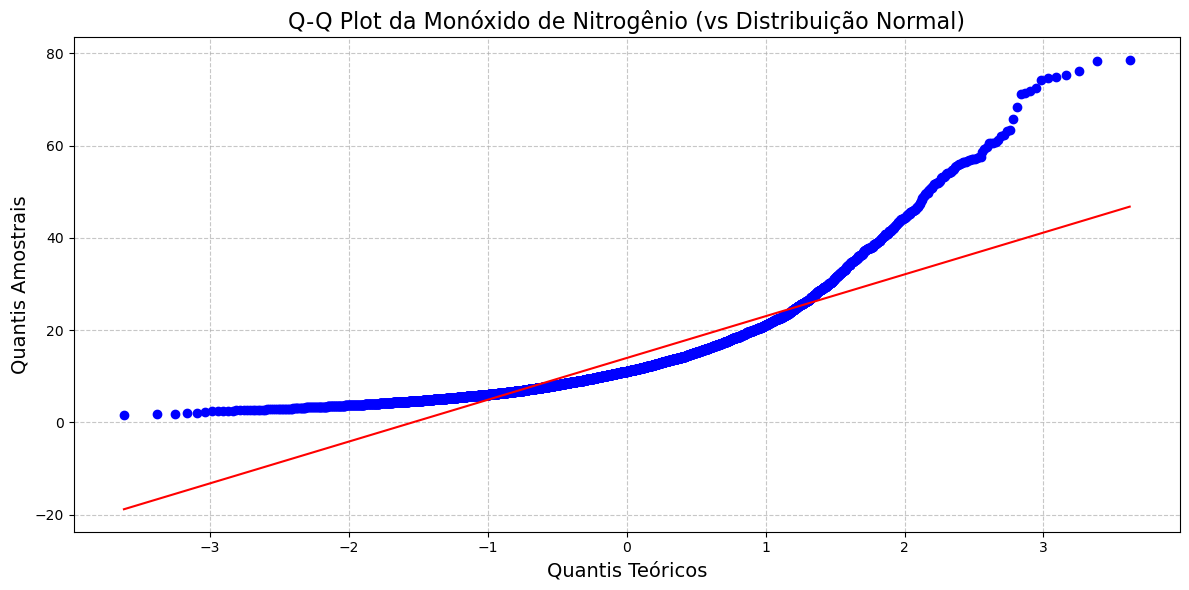

In [67]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['no'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Monóxido de Nitrogênio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [68]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [69]:
df_sensor['no_boxcox'] = np.nan

mask = (df_sensor['no'].notna())

no_validos = df_sensor.loc[mask, 'no']

no_boxcox, lambda_boxcox = stats.boxcox(no_validos + 1)

df_sensor.loc[mask, 'no_boxcox'] = no_boxcox

### Testes de normalidade após Boxcox



In [70]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['no_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'no'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'no'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'no'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para no: Estatística = 0.996, p-valor = 0.020
no NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 0.019930923357605934


In [71]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.024, p-valor = 0.601
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.6007531698794885


c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


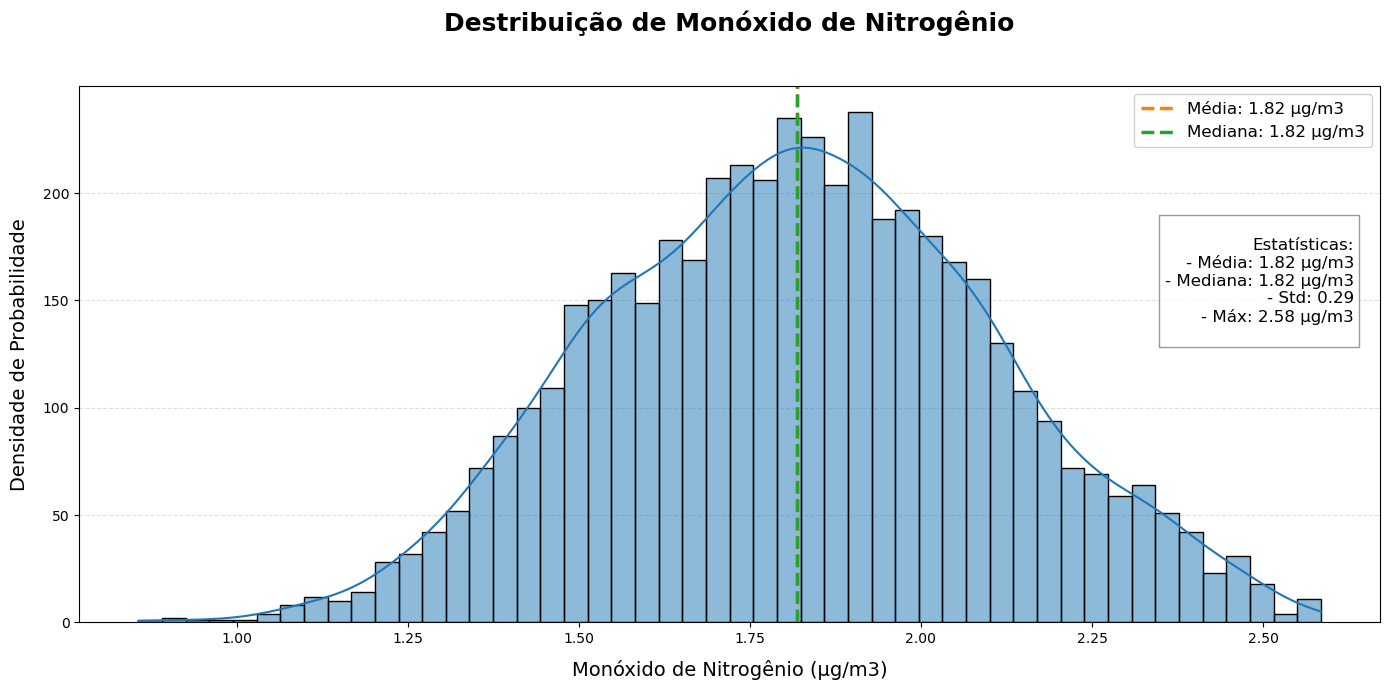

In [72]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='no_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de Monóxido de Nitrogênio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Monóxido de Nitrogênio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['no_boxcox'].mean()
median_val = df_sensor['no_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["no_boxcox"].std():.2f}
- Máx: {df_sensor["no_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

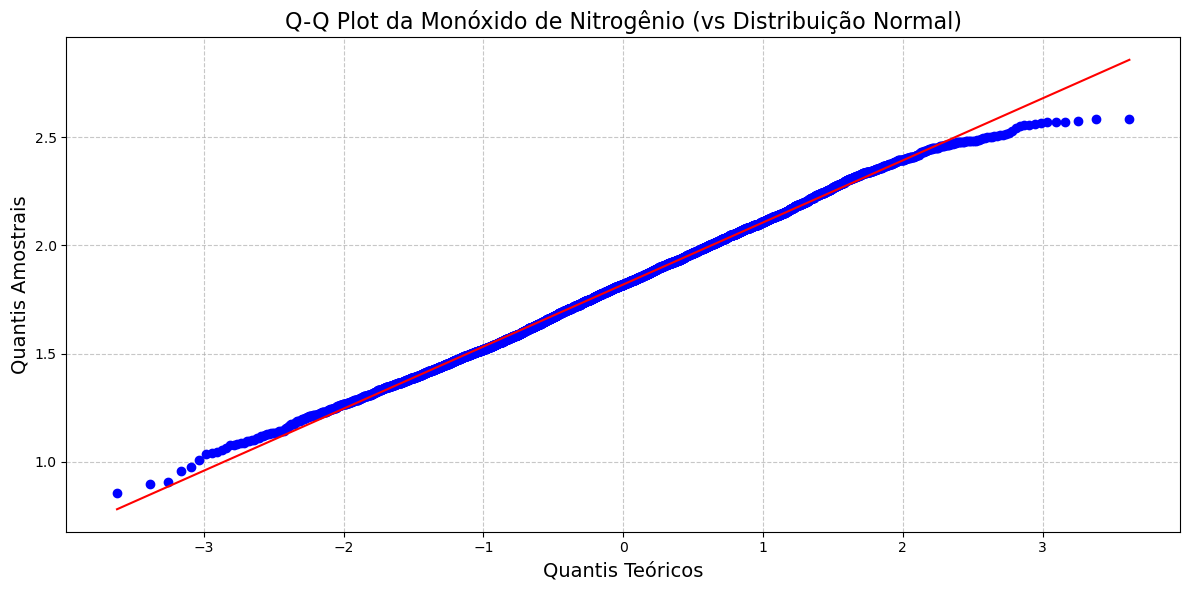

In [73]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['no_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Monóxido de Nitrogênio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna ur

In [74]:
#@title Dropando colunas no e renomeando 'no_boxcox' para no

df_sensor.drop(columns=['no'], inplace=True)
df_sensor.rename(columns={'no_boxcox': 'no'}, inplace=True)

## Dióxido de Nitrogênio

### Análise exploratória

In [75]:
#@title Describe dos dados

df_sensor['no2'].describe()

count    4726.000000
mean       32.666494
std        11.666108
min         6.719297
25%        24.431159
50%        31.196424
75%        38.931276
max        88.312396
Name: no2, dtype: float64

### Visualização gráfica

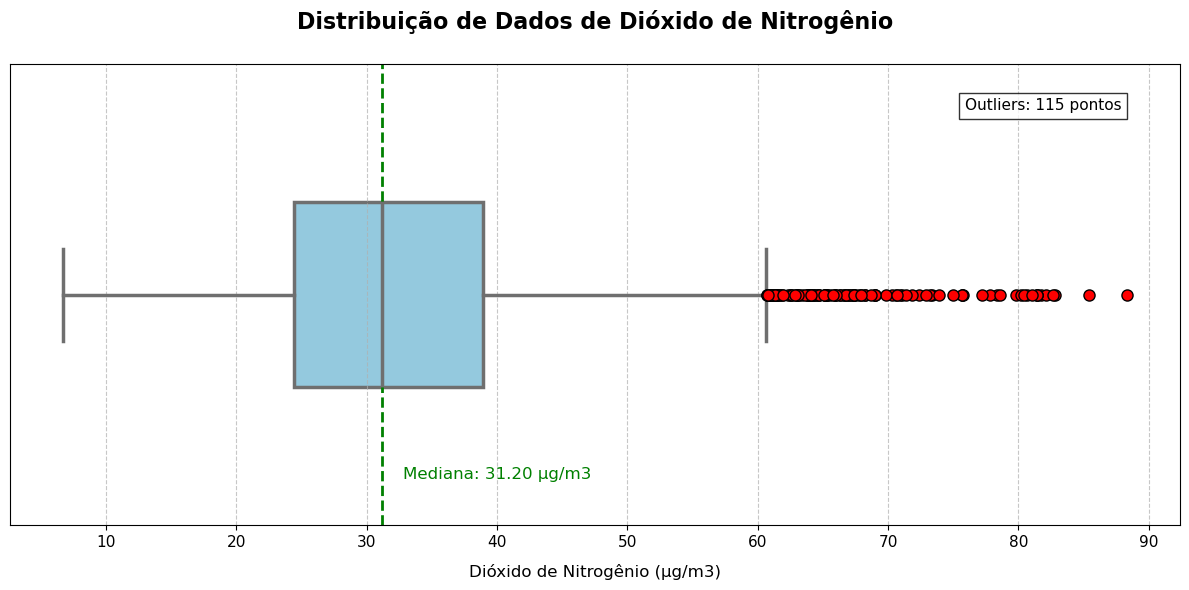

In [76]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['no2'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Dióxido de Nitrogênio\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Dióxido de Nitrogênio (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['no2'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['no2'].quantile(0.25)
q3 = df_sensor['no2'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['no2'] < q1 - 1.5*iqr) |
                            (df_sensor['no2'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


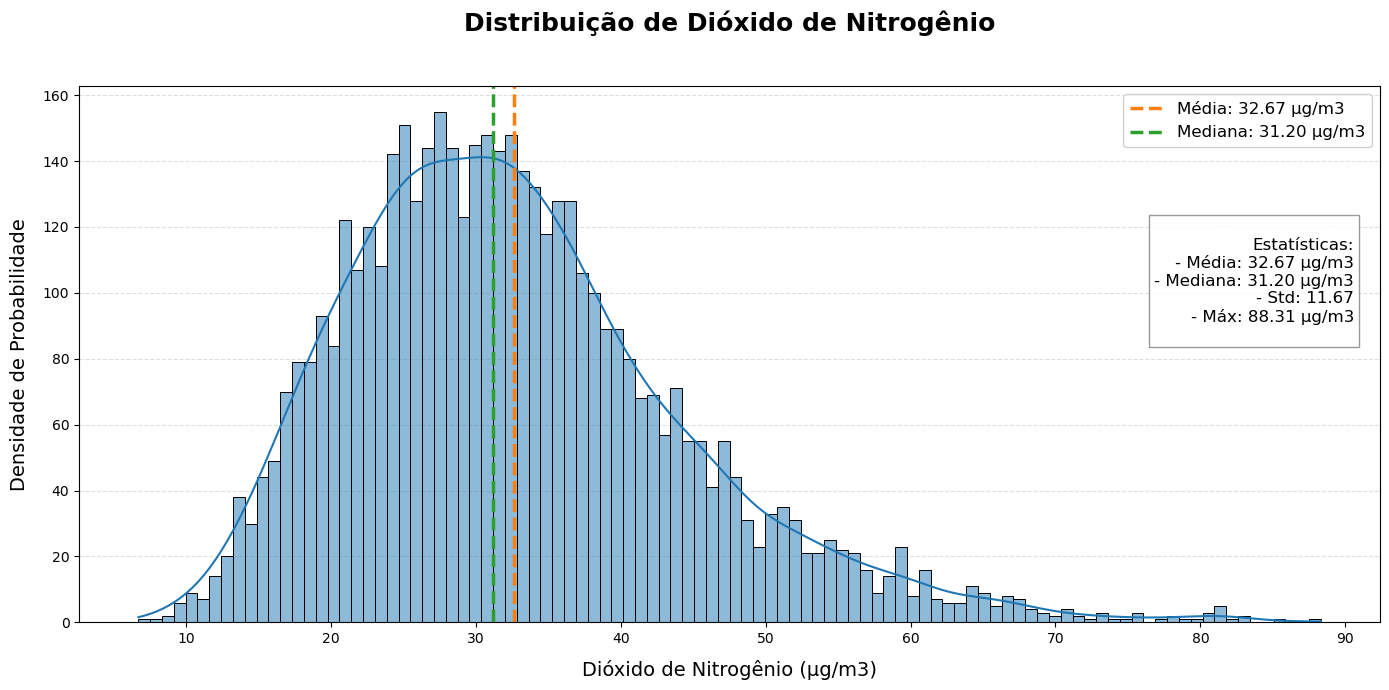

In [77]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='no2',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Dióxido de Nitrogênio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Dióxido de Nitrogênio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['no2'].mean()
median_val = df_sensor['no2'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['no2'].std():.2f}
- Máx: {df_sensor['no2'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [78]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['no2'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'no2'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'no2'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'no2'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para no2: Estatística = 0.959, p-valor = 0.000
no2 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 3.7975459581659555e-16


In [79]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.064, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 0.00046771751615972925


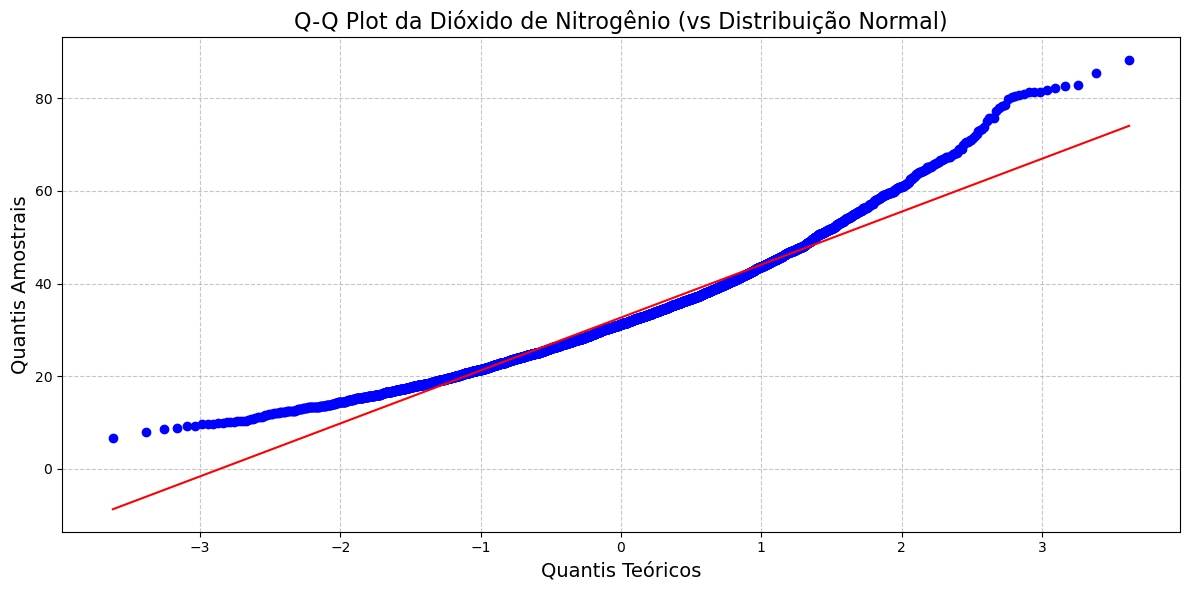

In [80]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['no2'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Dióxido de Nitrogênio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [81]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [82]:
df_sensor['no2_boxcox'] = np.nan

mask = (df_sensor['no2'].notna())

no2_validos = df_sensor.loc[mask, 'no2']

no2_boxcox, lambda_boxcox = stats.boxcox(no2_validos + 1)

df_sensor.loc[mask, 'no2_boxcox'] = no2_boxcox

### Testes de normalidade após Boxcox



In [83]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['no2_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'no2'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'no2'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'no2'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para no2: Estatística = 0.998, p-valor = 0.348
no2 parece seguir uma distribuição normal (p > 0.05).
p_value gerado: 0.34781086444854736


In [84]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.021, p-valor = 0.755
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.7553845818310208


c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


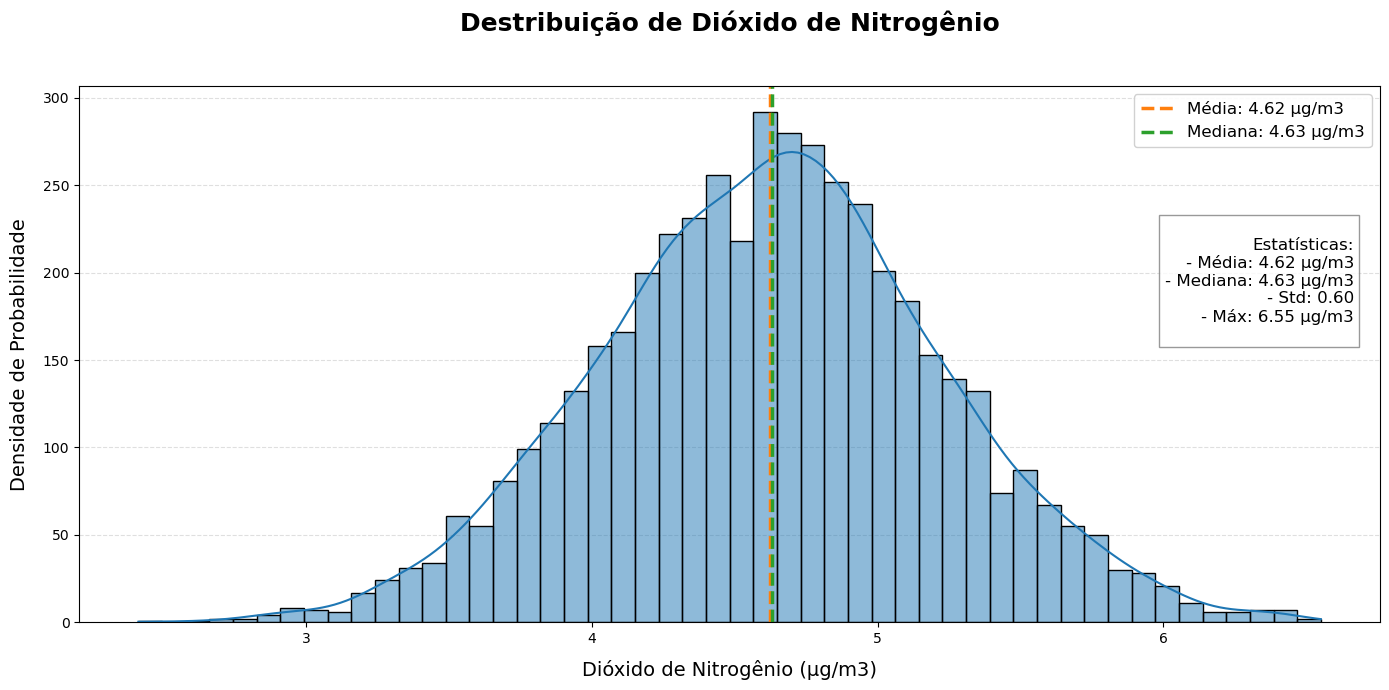

In [85]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='no2_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de Dióxido de Nitrogênio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Dióxido de Nitrogênio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['no2_boxcox'].mean()
median_val = df_sensor['no2_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["no2_boxcox"].std():.2f}
- Máx: {df_sensor["no2_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

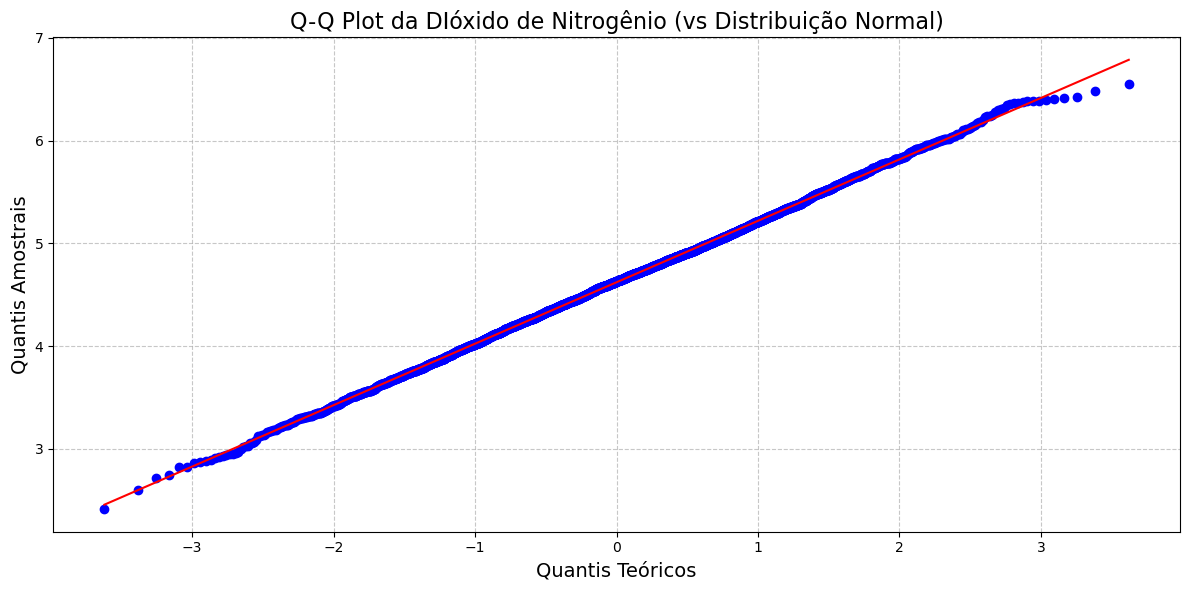

In [86]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['no2_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da DIóxido de Nitrogênio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna ur

In [87]:
#@title Dropando colunas no2 e renomeando 'no2_boxcox' para no2

df_sensor.drop(columns=['no2'], inplace=True)
df_sensor.rename(columns={'no2_boxcox': 'no2'}, inplace=True)

## Óxido de Nitrogênio

### Análise exploratória

In [88]:
#@title Describe dos dados

df_sensor['nox'].describe()

count    4726.000000
mean       46.581915
std        19.873256
min        11.154167
25%        32.794314
50%        42.559115
75%        55.473177
max       157.714635
Name: nox, dtype: float64

### Visualização gráfica

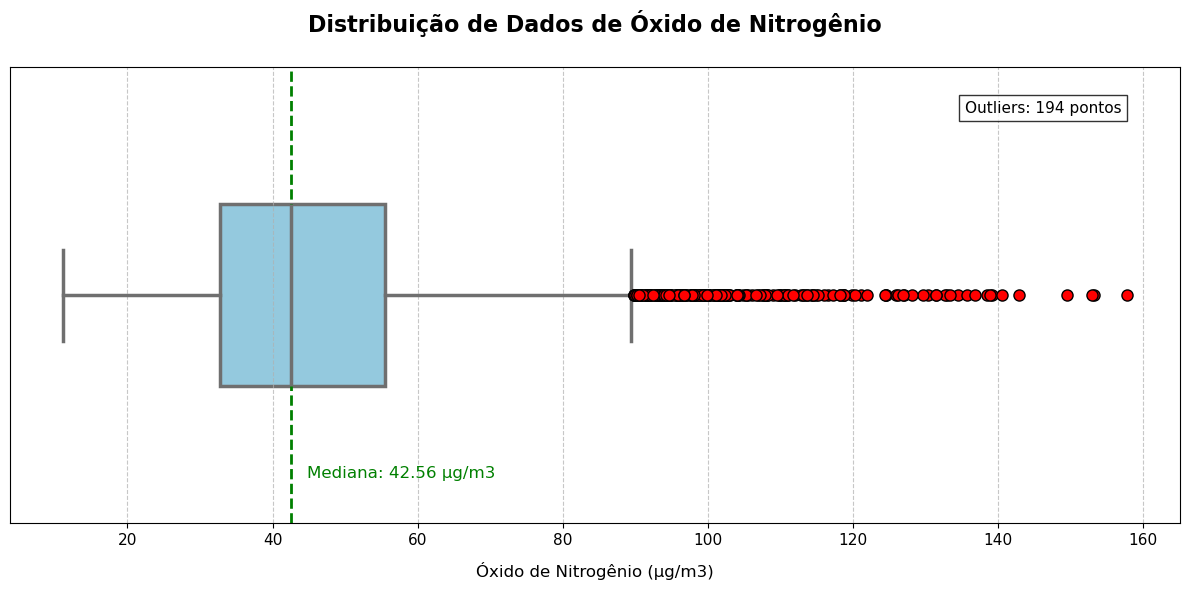

In [89]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['nox'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Óxido de Nitrogênio\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Óxido de Nitrogênio (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['nox'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['nox'].quantile(0.25)
q3 = df_sensor['nox'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['nox'] < q1 - 1.5*iqr) |
                            (df_sensor['nox'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


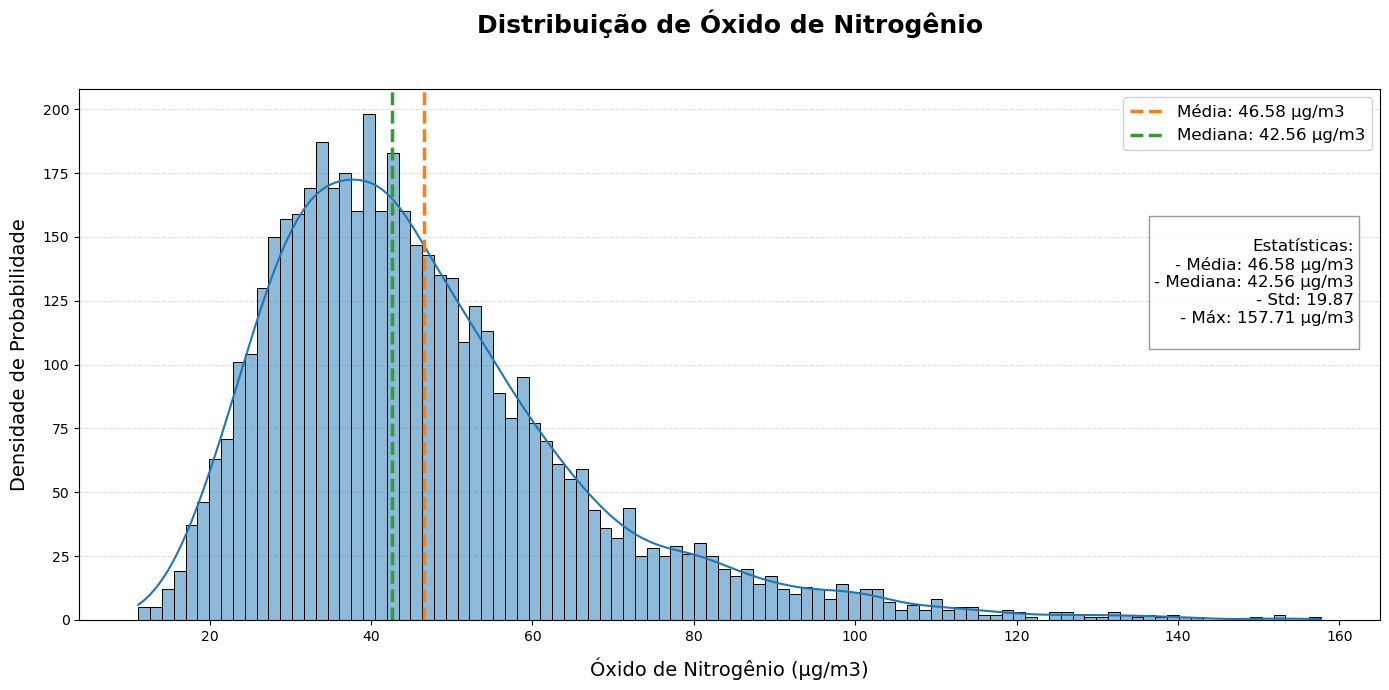

In [90]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='nox',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Óxido de Nitrogênio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Óxido de Nitrogênio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['nox'].mean()
median_val = df_sensor['nox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['nox'].std():.2f}
- Máx: {df_sensor['nox'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [91]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['nox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'nox'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'nox'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'nox'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para nox: Estatística = 0.907, p-valor = 0.000
nox NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 3.48198430956078e-24


In [92]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.102, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 2.011433388802964e-09


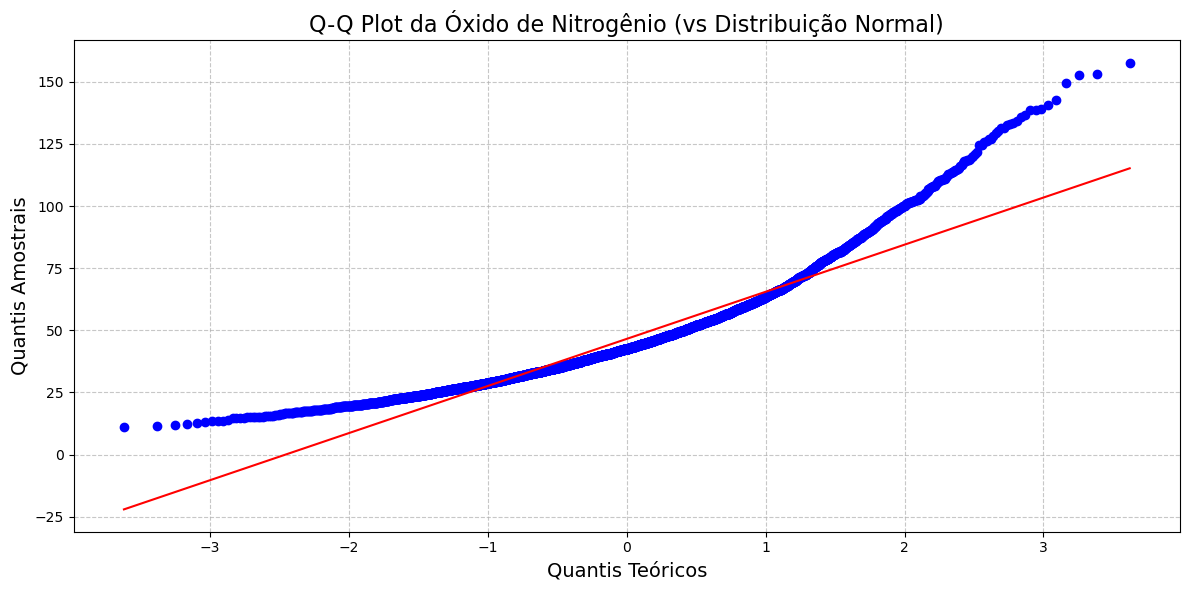

In [93]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['nox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Óxido de Nitrogênio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [94]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [95]:
df_sensor['nox_boxcox'] = np.nan

mask = (df_sensor['nox'].notna())

nox_validos = df_sensor.loc[mask, 'nox']

nox_boxcox, lambda_boxcox = stats.boxcox(nox_validos + 1)

df_sensor.loc[mask, 'nox_boxcox'] = nox_boxcox

### Testes de normalidade após Boxcox



In [96]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['nox_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'nox'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'nox'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'nox'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para nox: Estatística = 0.998, p-valor = 0.281
nox parece seguir uma distribuição normal (p > 0.05).
p_value gerado: 0.2810012400150299


In [97]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.024, p-valor = 0.617
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.6174694906642146


c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


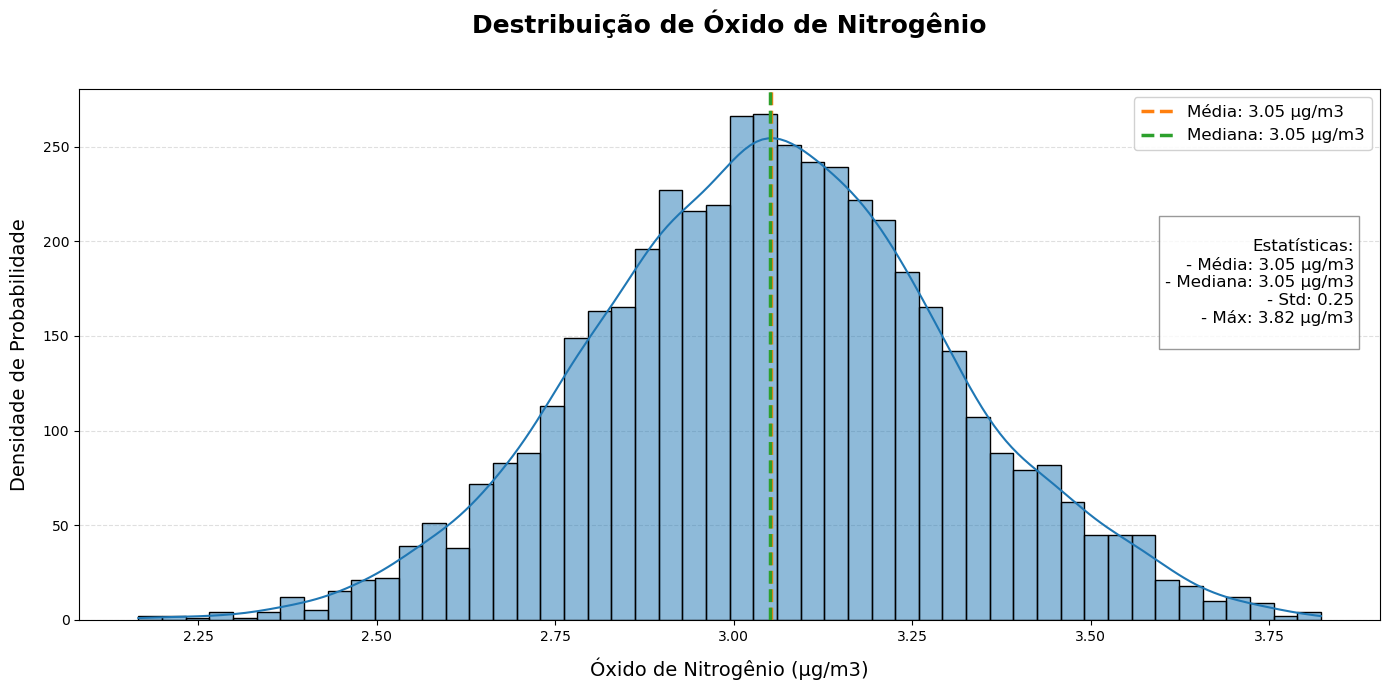

In [98]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='nox_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de Óxido de Nitrogênio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Óxido de Nitrogênio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['nox_boxcox'].mean()
median_val = df_sensor['nox_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["nox_boxcox"].std():.2f}
- Máx: {df_sensor["nox_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

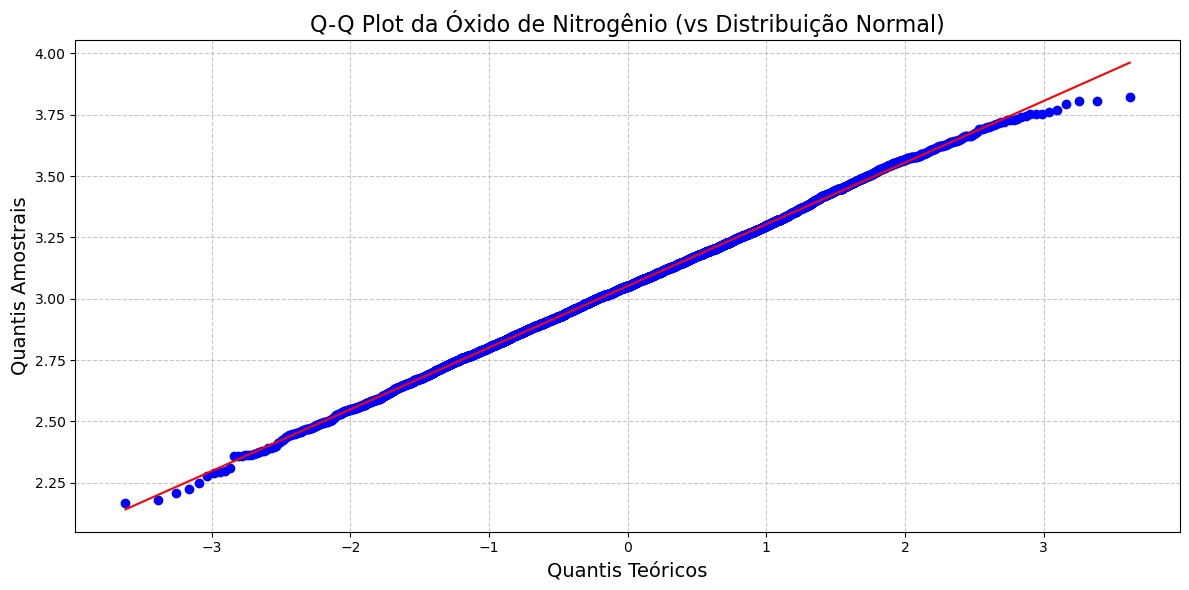

In [99]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['nox_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Óxido de Nitrogênio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna ur

In [100]:
#@title Dropando colunas nox e renomeando 'nox_boxcox' para nox

df_sensor.drop(columns=['nox'], inplace=True)
df_sensor.rename(columns={'nox_boxcox': 'nox'}, inplace=True)

## Dióxido de Enxofre

### Análise exploratória

In [101]:
#@title Describe dos dados

df_sensor['so2'].describe()

count    4489.000000
mean        4.856739
std         3.024015
min         0.000000
25%         2.921806
50%         4.520104
75%         6.250972
max       110.119189
Name: so2, dtype: float64

### Visualização gráfica

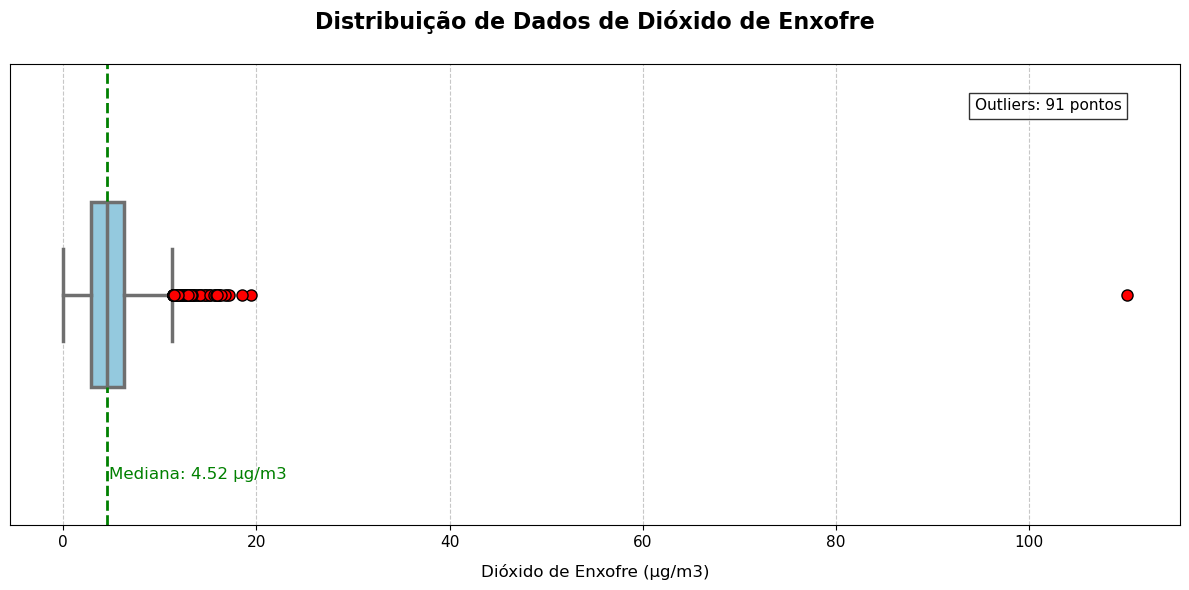

In [102]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['so2'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Dióxido de Enxofre\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Dióxido de Enxofre (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['so2'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['so2'].quantile(0.25)
q3 = df_sensor['so2'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['so2'] < q1 - 1.5*iqr) |
                            (df_sensor['so2'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


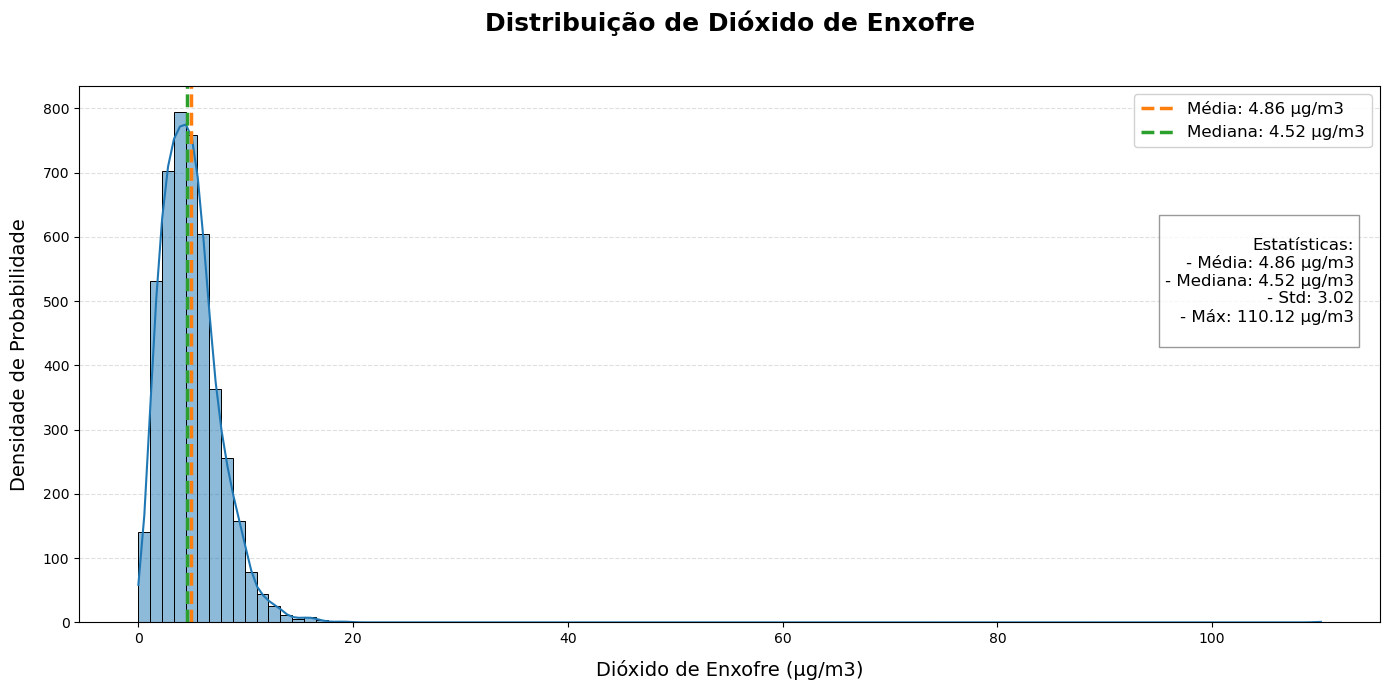

In [103]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='so2',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Dióxido de Enxofre\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Dióxido de Enxofre (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['so2'].mean()
median_val = df_sensor['so2'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['so2'].std():.2f}
- Máx: {df_sensor['so2'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [104]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['so2'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'so2'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'so2'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'so2'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para so2: Estatística = 0.949, p-valor = 0.000
so2 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 4.015209966768139e-18


In [105]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.072, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 6.440795143230517e-05


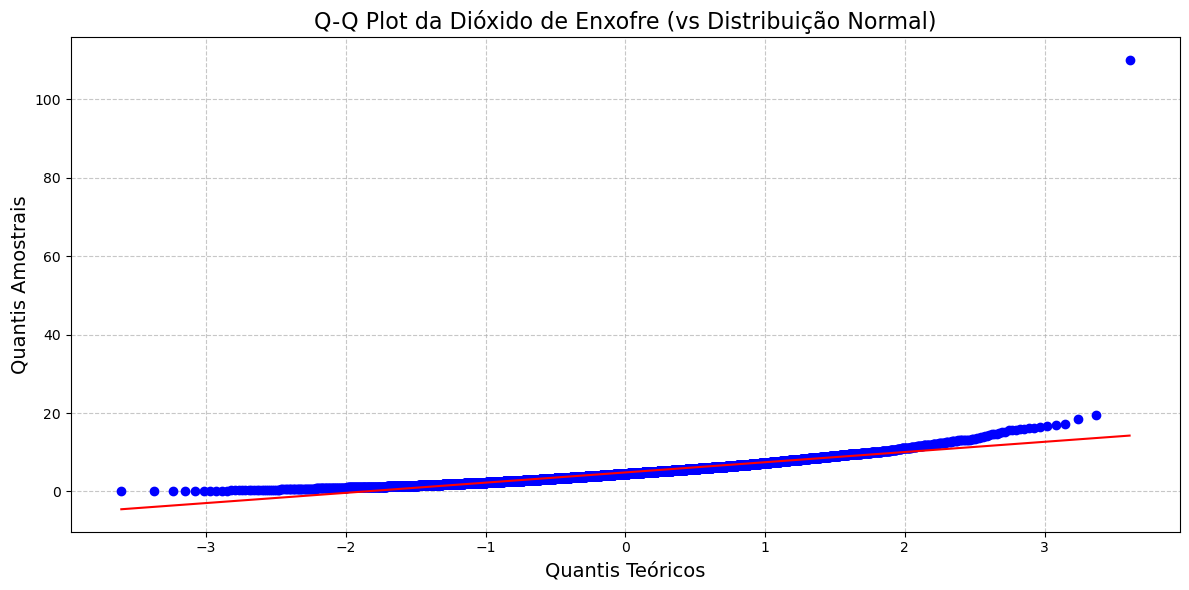

In [106]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['so2'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Dióxido de Enxofre (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [107]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [108]:
df_sensor['so2_boxcox'] = np.nan

mask = (df_sensor['so2'].notna())

so2_validos = df_sensor.loc[mask, 'so2']

so2_boxcox, lambda_boxcox = stats.boxcox(so2_validos + 1)

df_sensor.loc[mask, 'so2_boxcox'] = so2_boxcox

### Testes de normalidade após Boxcox



In [109]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['so2_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'so2'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'so2'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'so2'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para so2: Estatística = 0.998, p-valor = 0.236
so2 parece seguir uma distribuição normal (p > 0.05).
p_value gerado: 0.23589199781417847


In [110]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.030, p-valor = 0.322
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.3221277776370378


c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


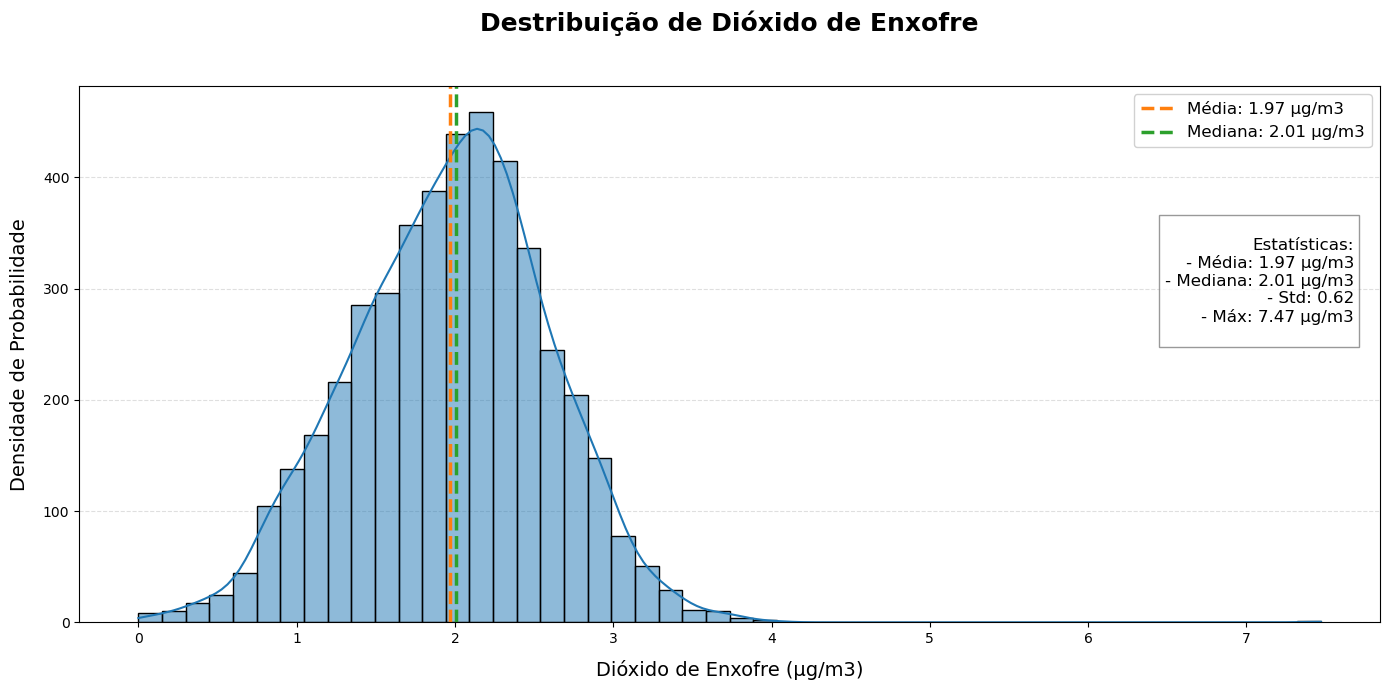

In [111]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='so2_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de Dióxido de Enxofre\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Dióxido de Enxofre (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['so2_boxcox'].mean()
median_val = df_sensor['so2_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["so2_boxcox"].std():.2f}
- Máx: {df_sensor["so2_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

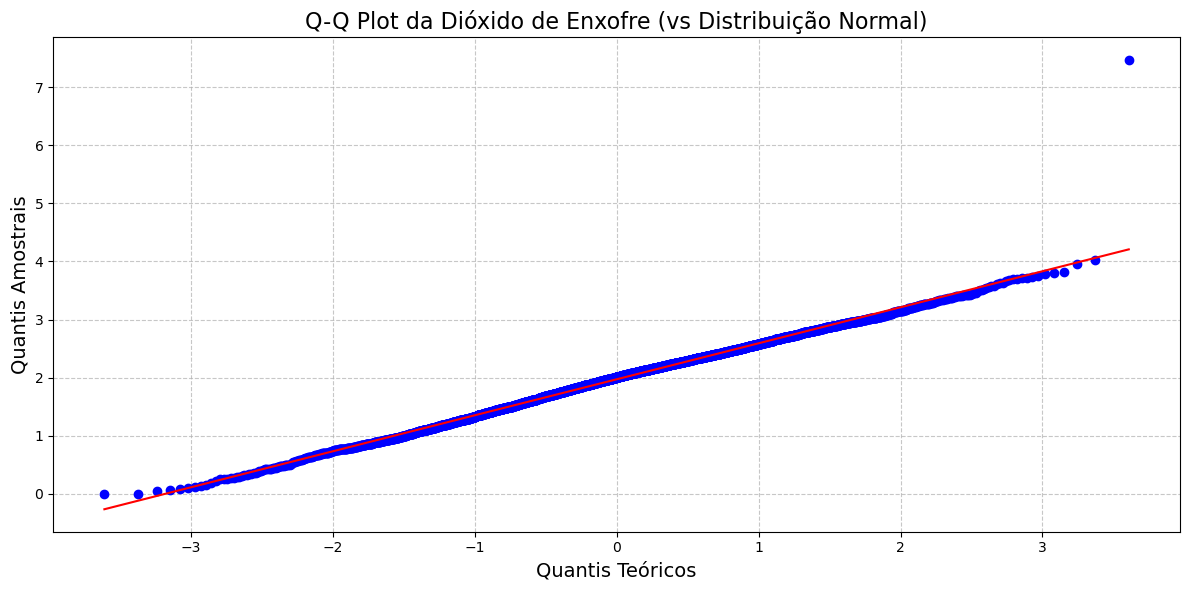

In [112]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['so2_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Dióxido de Enxofre (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna so2

In [113]:
#@title Dropando colunas so2 e renomeando 'so2_boxcox' para so2

df_sensor.drop(columns=['so2'], inplace=True)
df_sensor.rename(columns={'so2_boxcox': 'so2'}, inplace=True)

## Ozônio

### Análise exploratória

In [114]:
#@title Describe dos dados

df_sensor['o3'].describe()

count    4727.000000
mean       34.106669
std        12.026059
min         4.287917
25%        25.618437
50%        32.998810
75%        41.103140
max        95.219702
Name: o3, dtype: float64

### Visualização gráfica

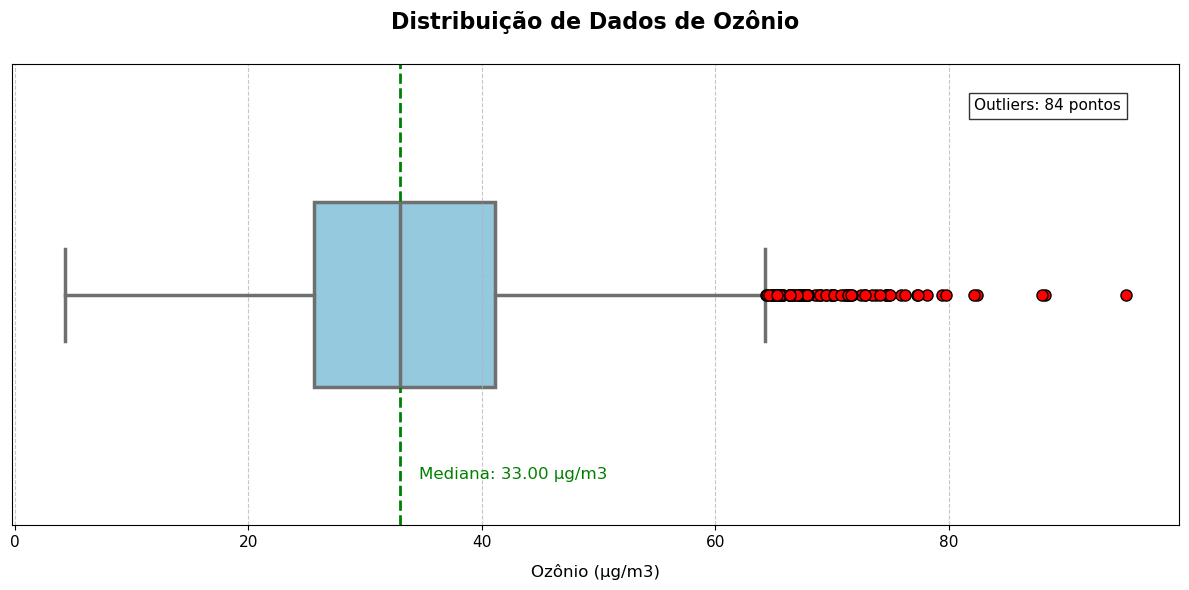

In [115]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['o3'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Ozônio\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Ozônio (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['o3'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['o3'].quantile(0.25)
q3 = df_sensor['o3'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['o3'] < q1 - 1.5*iqr) |
                            (df_sensor['o3'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


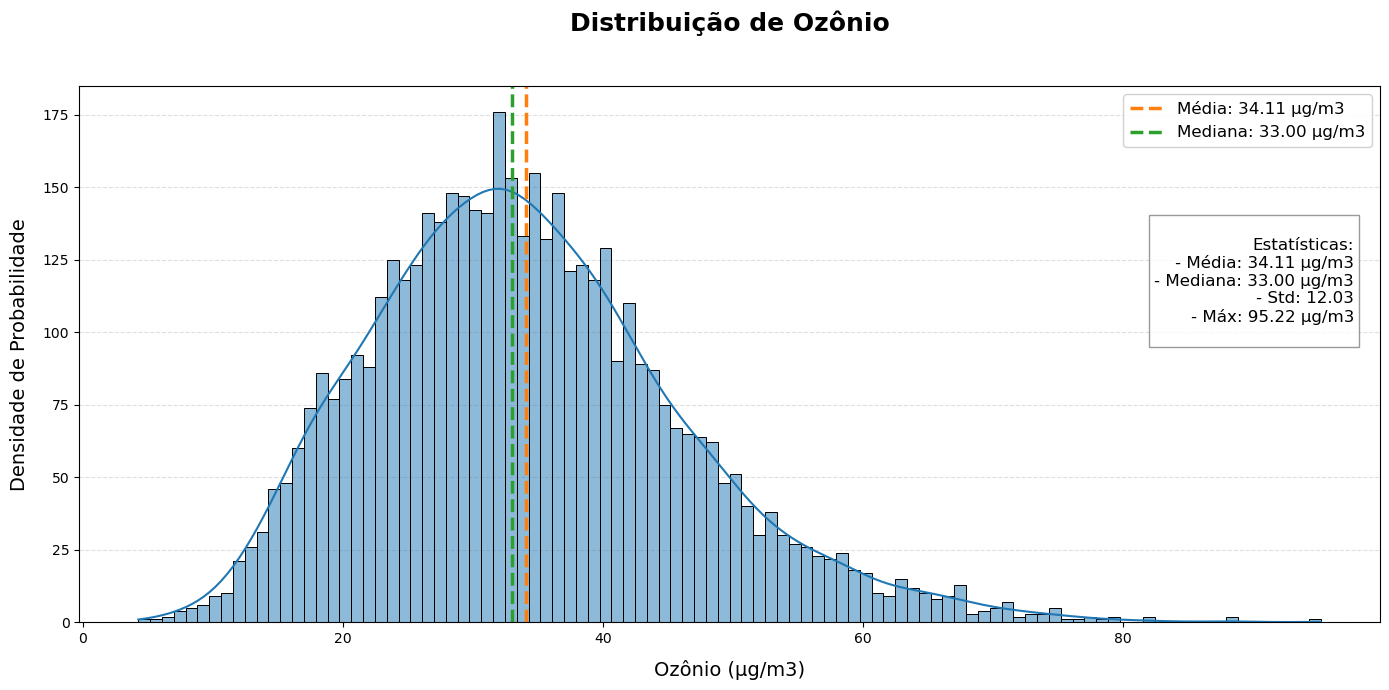

In [116]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='o3',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Ozônio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Ozônio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['o3'].mean()
median_val = df_sensor['o3'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['o3'].std():.2f}
- Máx: {df_sensor['o3'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [117]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['o3'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'o3'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'o3'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'o3'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para o3: Estatística = 0.986, p-valor = 0.000
o3 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 2.249042729829398e-08


In [118]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.042, p-valor = 0.055
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.05493605992742989


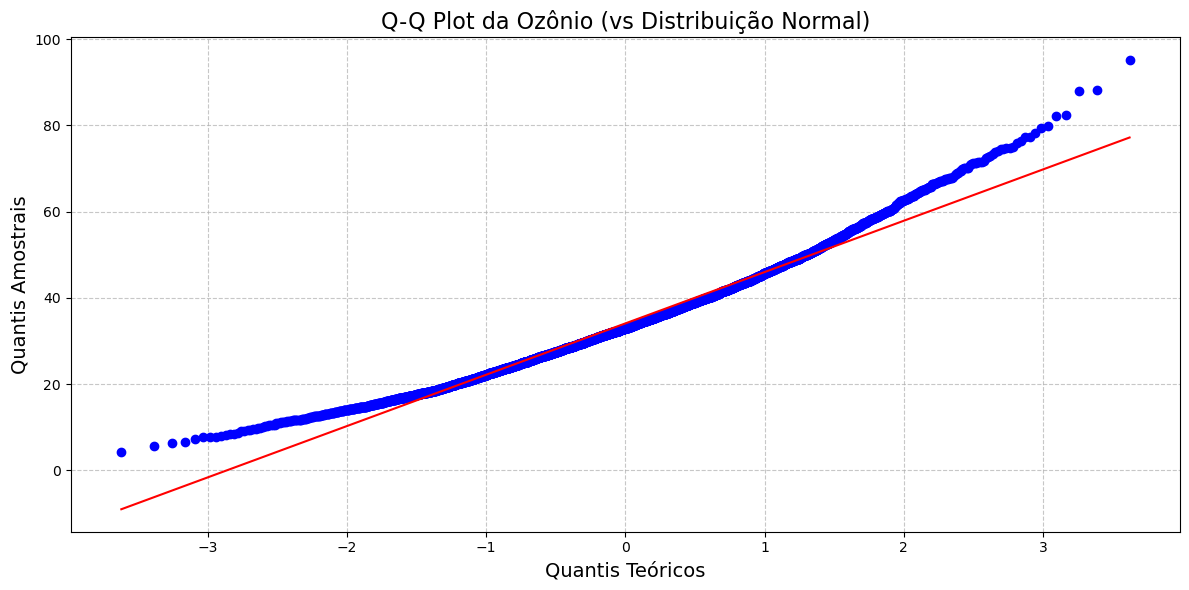

In [119]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['o3'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Ozônio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [120]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [121]:
df_sensor['o3_boxcox'] = np.nan

mask = (df_sensor['o3'].notna())

o3_validos = df_sensor.loc[mask, 'o3']

o3_boxcox, lambda_boxcox = stats.boxcox(o3_validos + 1)

df_sensor.loc[mask, 'o3_boxcox'] = o3_boxcox

### Testes de normalidade após Boxcox



In [122]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['o3_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'o3'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'o3'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'o3'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para o3: Estatística = 0.998, p-valor = 0.201
o3 parece seguir uma distribuição normal (p > 0.05).
p_value gerado: 0.20142193138599396


In [123]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.026, p-valor = 0.479
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.47893100437841296


c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


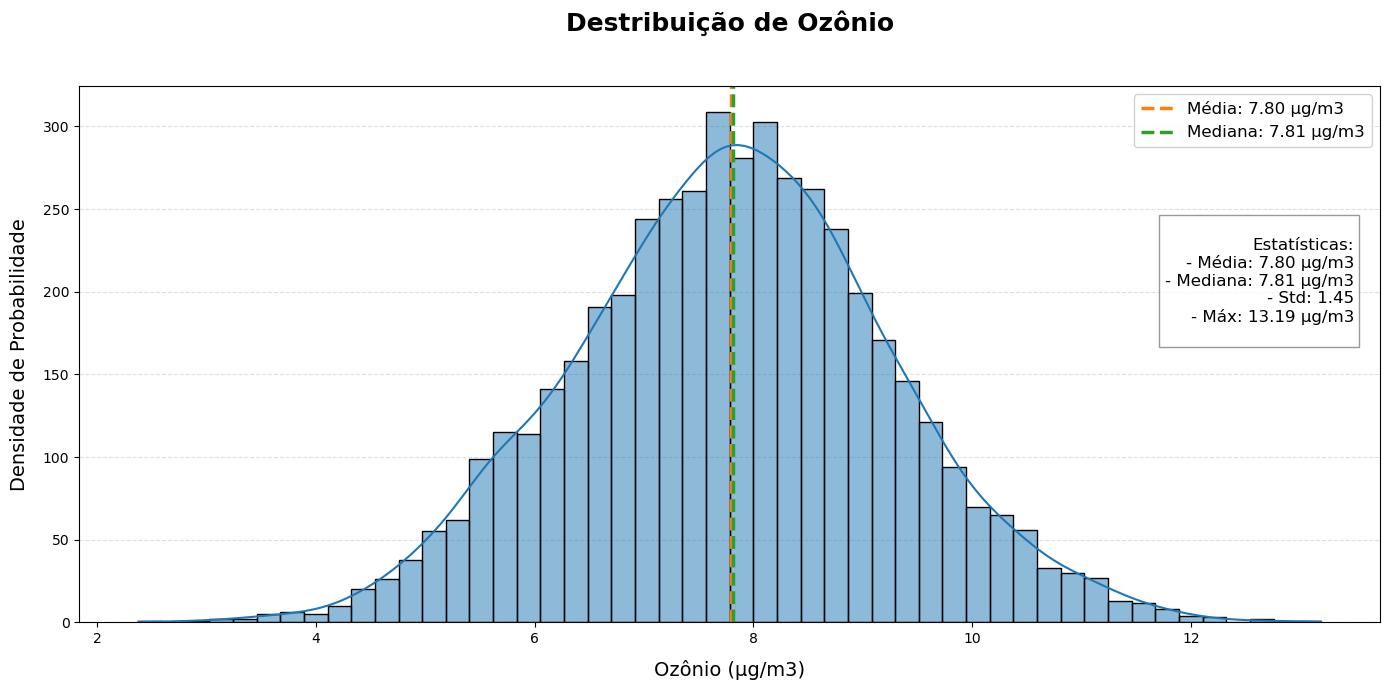

In [124]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='o3_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de Ozônio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Ozônio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['o3_boxcox'].mean()
median_val = df_sensor['o3_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["o3_boxcox"].std():.2f}
- Máx: {df_sensor["o3_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

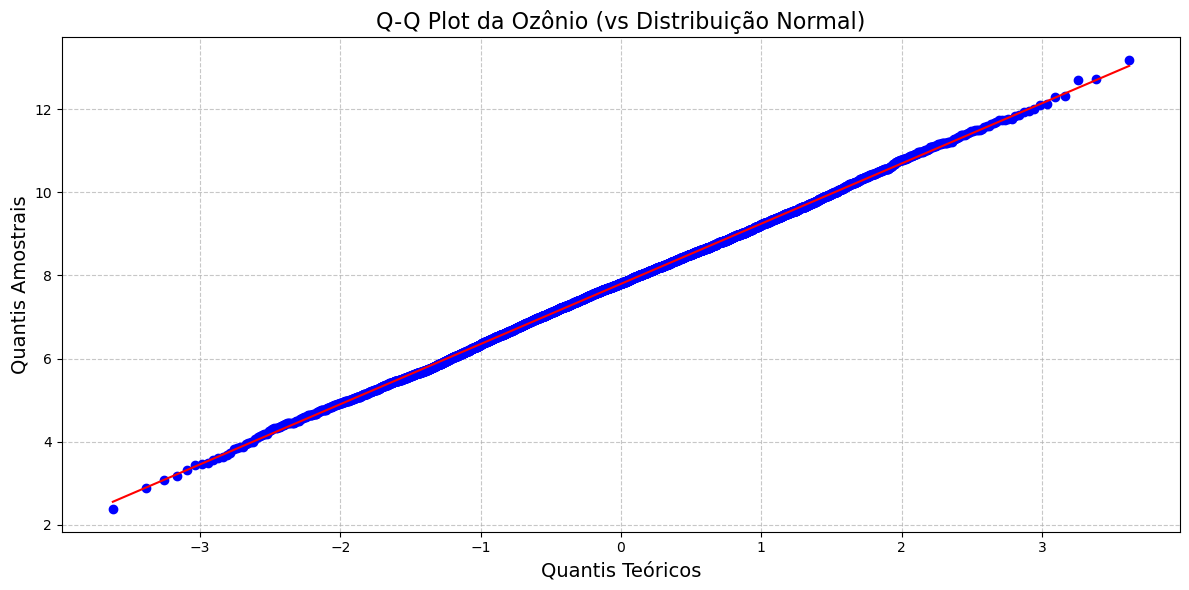

In [125]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['o3_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Ozônio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna so2

In [126]:
#@title Dropando colunas o3 e renomeando 'o3_boxcox' para o3

df_sensor.drop(columns=['o3'], inplace=True)
df_sensor.rename(columns={'o3_boxcox': 'o3'}, inplace=True)

## PM10

### Análise exploratória

In [127]:
#@title Describe dos dados

df_sensor['pm10'].describe()

count    4727.000000
mean       35.610067
std        13.765460
min         8.633929
25%        25.808160
50%        32.690476
75%        43.206659
max       113.315104
Name: pm10, dtype: float64

### Visualização gráfica

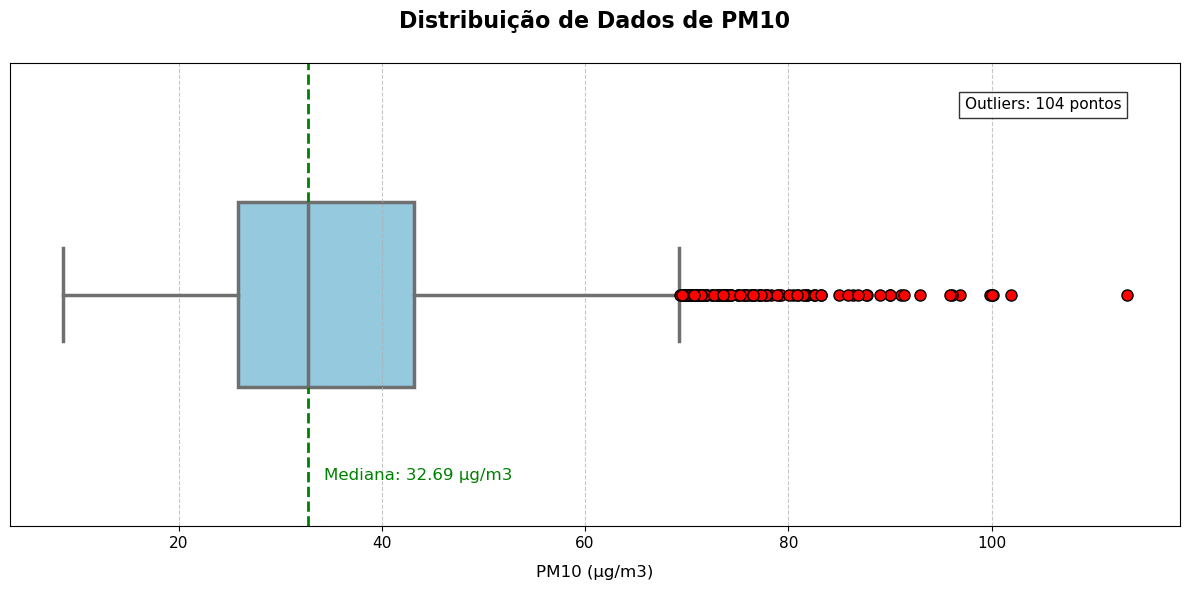

In [128]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['pm10'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de PM10\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('PM10 (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['pm10'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['pm10'].quantile(0.25)
q3 = df_sensor['pm10'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['pm10'] < q1 - 1.5*iqr) |
                            (df_sensor['pm10'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


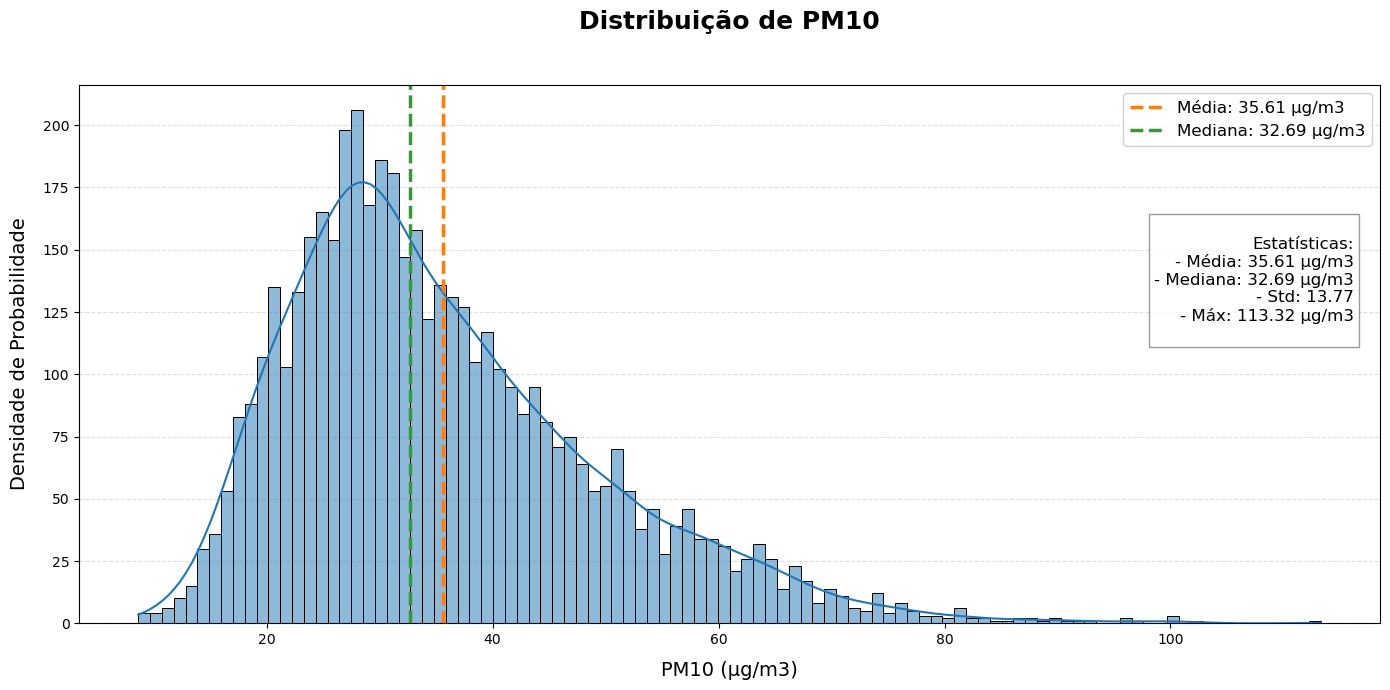

In [129]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='pm10',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de PM10\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('PM10 (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['pm10'].mean()
median_val = df_sensor['pm10'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['pm10'].std():.2f}
- Máx: {df_sensor['pm10'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [130]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['pm10'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'pm10'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'pm10'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'pm10'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para pm10: Estatística = 0.935, p-valor = 0.000
pm10 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 1.8991305922677452e-20


In [131]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.077, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 1.1609756517334132e-05


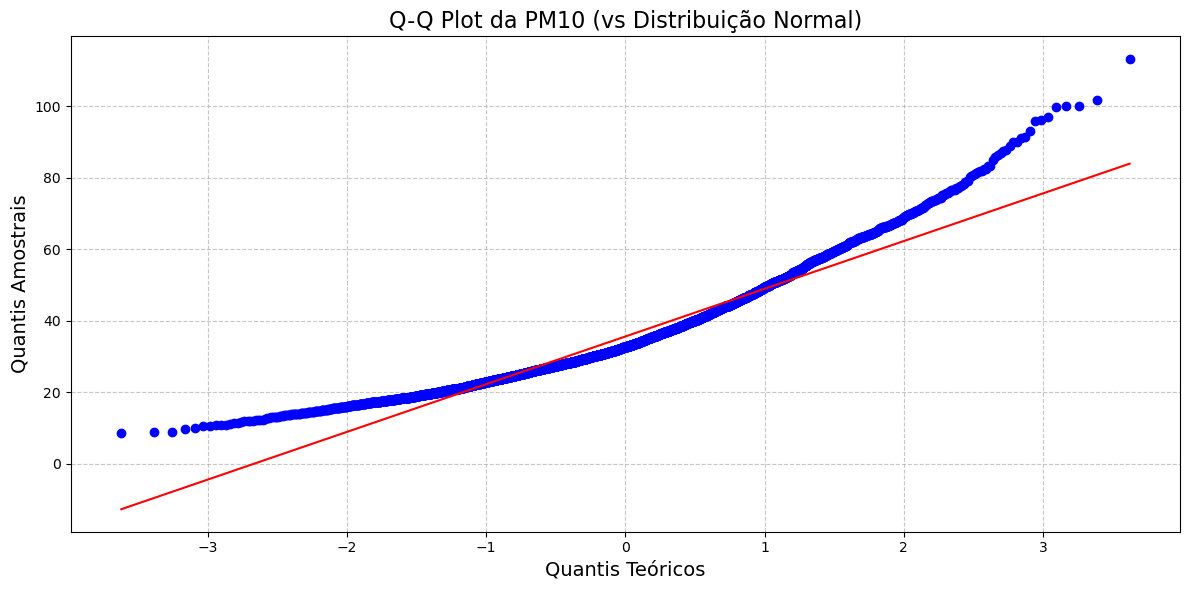

In [132]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['pm10'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da PM10 (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [133]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [134]:
df_sensor['pm10_boxcox'] = np.nan

mask = (df_sensor['pm10'].notna())

pm10_validos = df_sensor.loc[mask, 'pm10']

pm10_boxcox, lambda_boxcox = stats.boxcox(pm10_validos + 1)

df_sensor.loc[mask, 'pm10_boxcox'] = pm10_boxcox

### Testes de normalidade após Boxcox



In [135]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['pm10_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'pm10'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'pm10'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'pm10'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para pm10: Estatística = 0.998, p-valor = 0.289
pm10 parece seguir uma distribuição normal (p > 0.05).
p_value gerado: 0.2887031137943268


In [136]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.020, p-valor = 0.823
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.8226376861627012


c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


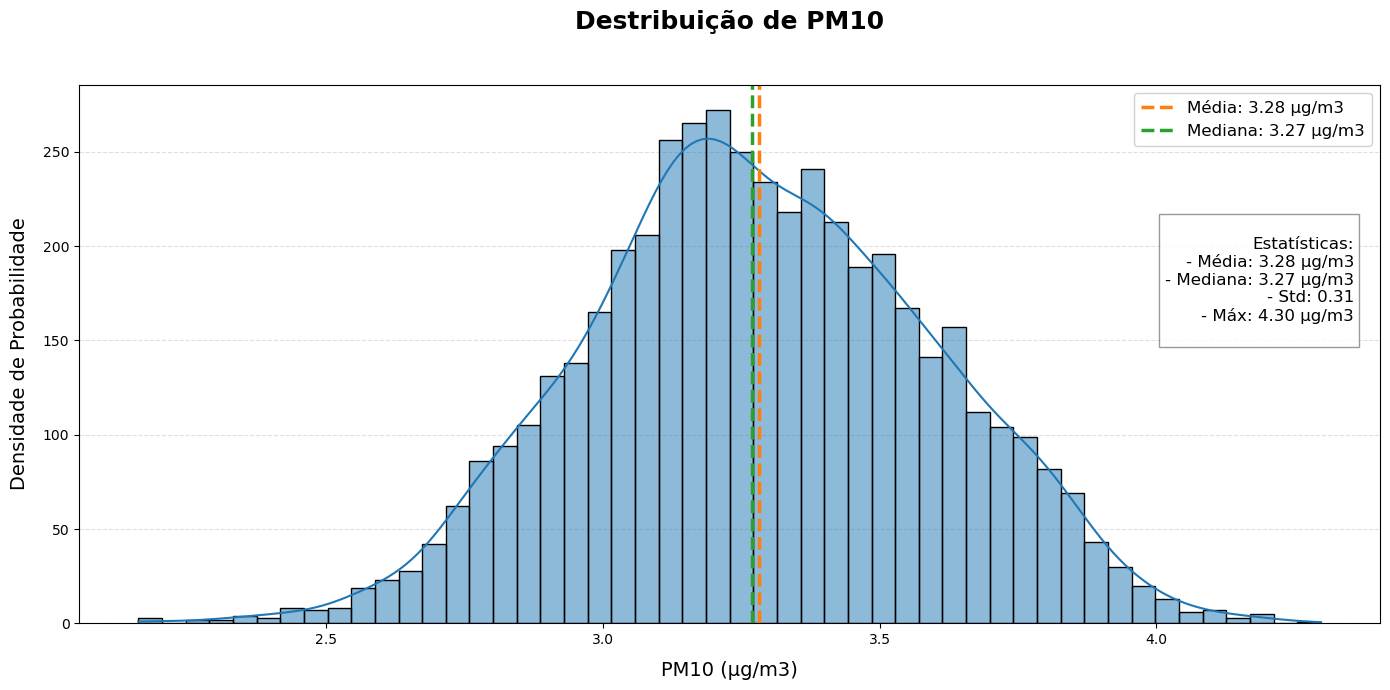

In [137]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='pm10_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de PM10\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('PM10 (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['pm10_boxcox'].mean()
median_val = df_sensor['pm10_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["pm10_boxcox"].std():.2f}
- Máx: {df_sensor["pm10_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

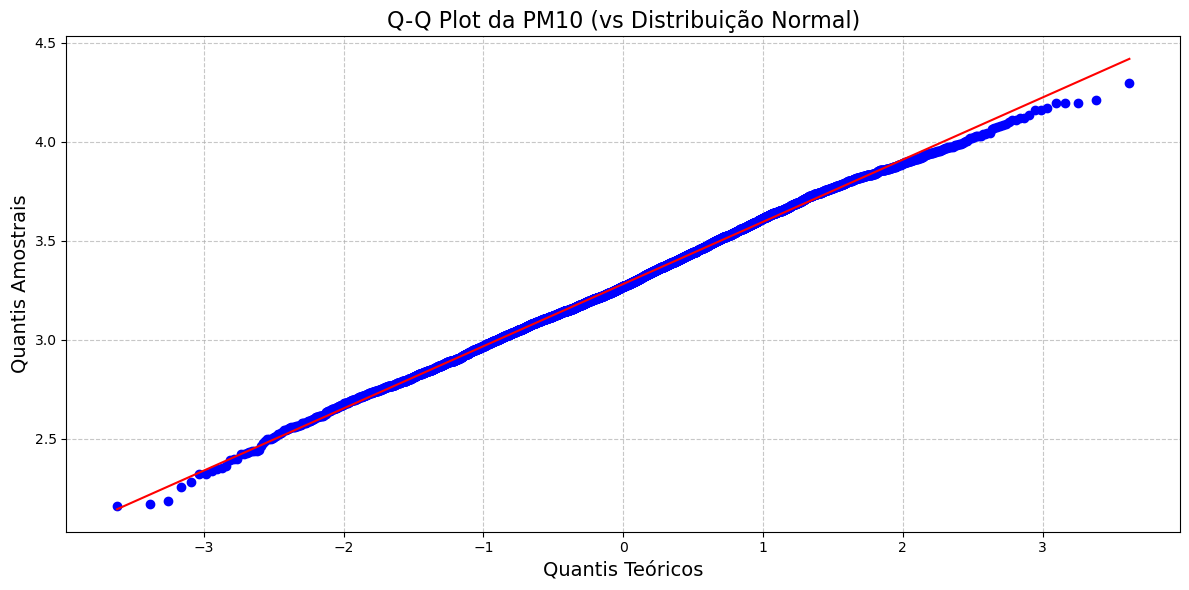

In [138]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['pm10_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da PM10 (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna PM10

In [139]:
#@title Dropando colunas pm10 e renomeando 'pm10_boxcox' para pm10

df_sensor.drop(columns=['pm10'], inplace=True)
df_sensor.rename(columns={'pm10_boxcox': 'pm10'}, inplace=True)

## PM2.5

### Análise exploratória

In [140]:
#@title Describe dos dados

df_sensor['pm2_5'].describe()

count    4272.000000
mean       16.482472
std        10.645550
min         0.000000
25%         9.125000
50%        14.346609
75%        21.041667
max        92.229167
Name: pm2_5, dtype: float64

### Visualização gráfica

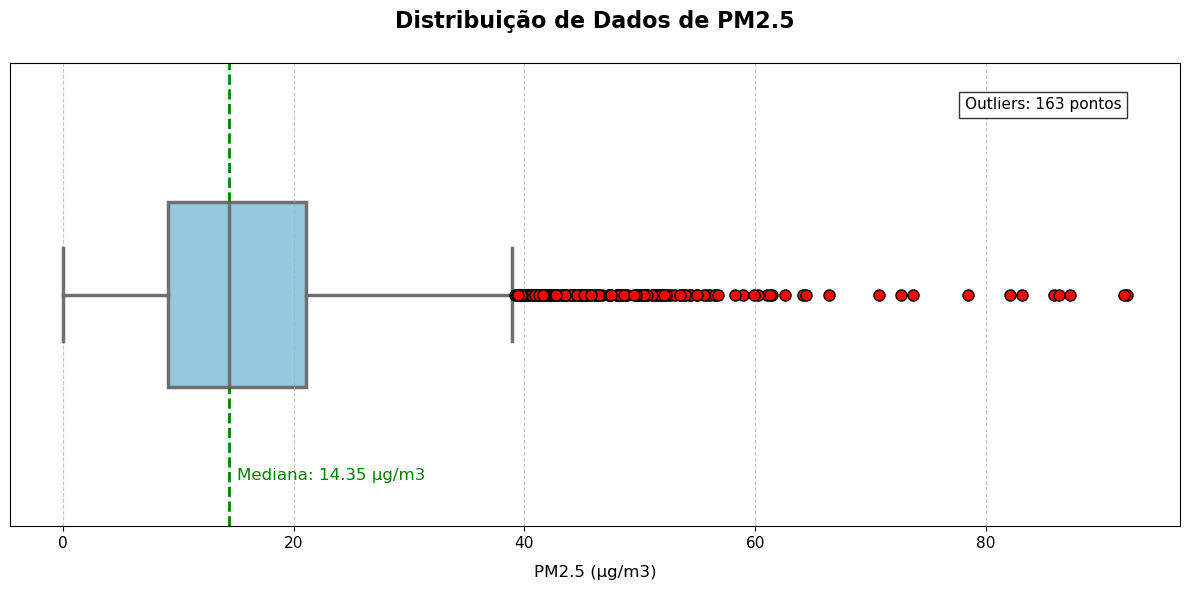

In [141]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['pm2_5'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de PM2.5\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('PM2.5 (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['pm2_5'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['pm2_5'].quantile(0.25)
q3 = df_sensor['pm2_5'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['pm2_5'] < q1 - 1.5*iqr) |
                            (df_sensor['pm2_5'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


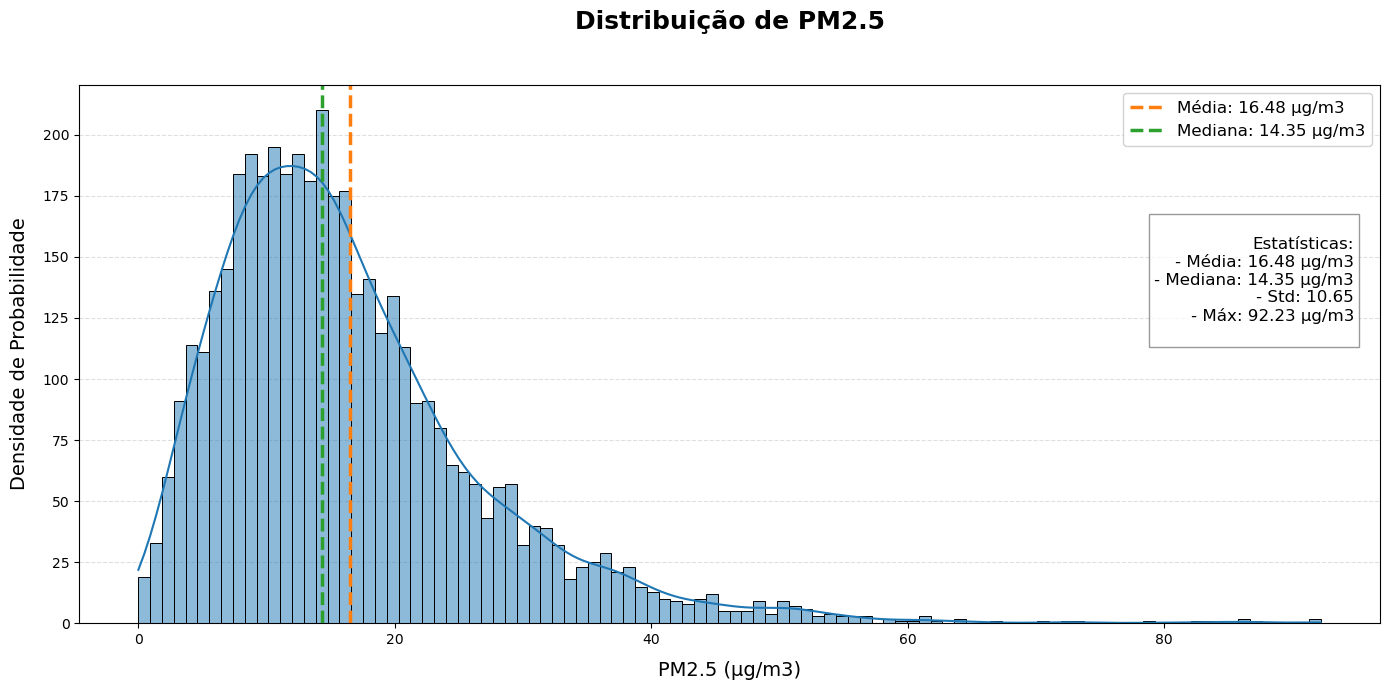

In [142]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='pm2_5',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de PM2.5\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('PM2.5 (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['pm2_5'].mean()
median_val = df_sensor['pm2_5'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['pm2_5'].std():.2f}
- Máx: {df_sensor['pm2_5'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [143]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['pm2_5'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'pm2_5'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'pm2_5'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'pm2_5'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para pm2_5: Estatística = 0.899, p-valor = 0.000
pm2_5 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 3.580588865877399e-25


In [144]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.106, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 3.543003322111866e-10


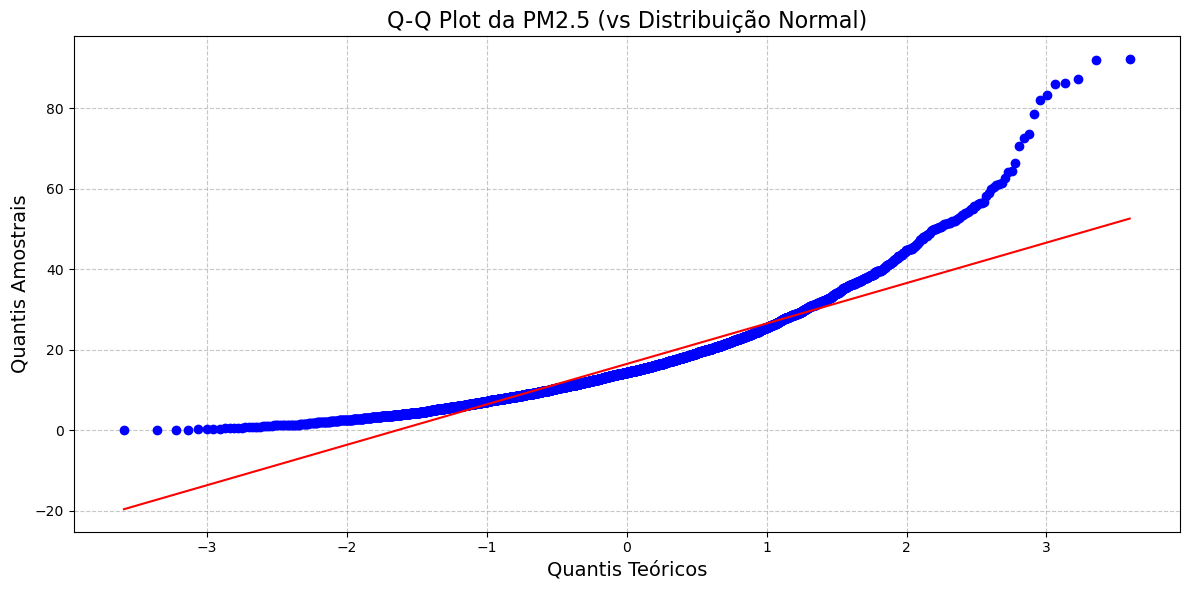

In [145]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['pm2_5'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da PM2.5 (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [146]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [147]:
df_sensor['pm2_5_boxcox'] = np.nan

mask = (df_sensor['pm2_5'].notna())

pm2_5_validos = df_sensor.loc[mask, 'pm2_5']

pm2_5_boxcox, lambda_boxcox = stats.boxcox(pm2_5_validos + 1)

df_sensor.loc[mask, 'pm2_5_boxcox'] = pm2_5_boxcox

### Testes de normalidade após Boxcox



In [148]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['pm2_5_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'pm2_5'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'pm2_5'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'pm2_5'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para pm2_5: Estatística = 0.999, p-valor = 0.778
pm2_5 parece seguir uma distribuição normal (p > 0.05).
p_value gerado: 0.7778535485267639


In [149]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.023, p-valor = 0.658
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.6575314541768615


c:\Users\jhter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


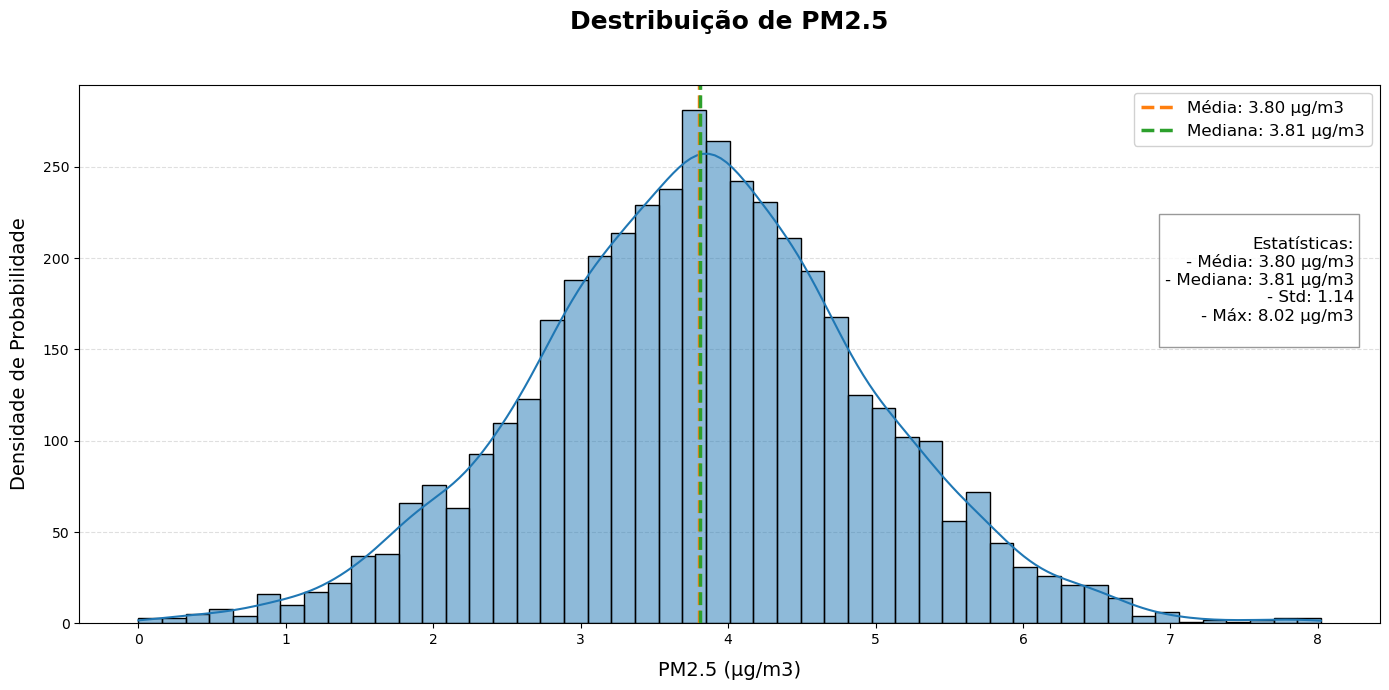

In [150]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='pm2_5_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de PM2.5\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('PM2.5 (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['pm2_5_boxcox'].mean()
median_val = df_sensor['pm2_5_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["pm2_5_boxcox"].std():.2f}
- Máx: {df_sensor["pm2_5_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

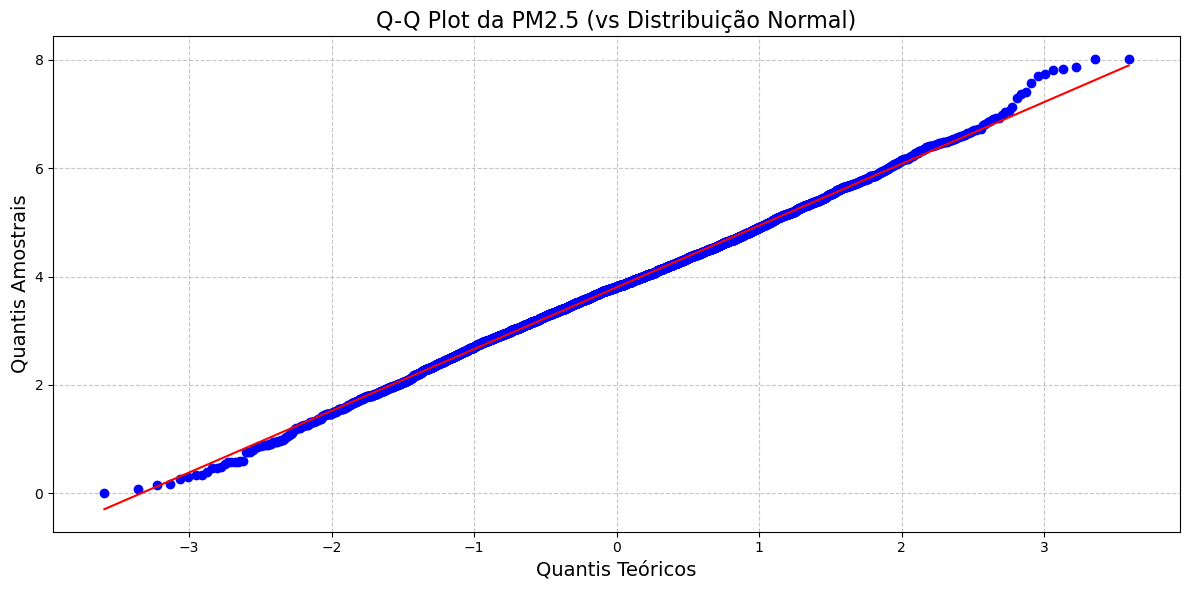

In [151]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['pm2_5_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da PM2.5 (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna PM2.5

In [152]:
#@title Dropando colunas pm2_5 e renomeando 'pm2_5_boxcox' para pm2_5

df_sensor.drop(columns=['pm2_5'], inplace=True)
df_sensor.rename(columns={'pm2_5_boxcox': 'pm2_5'}, inplace=True)

## AQI

### Análise exploratória

In [153]:
#@title Describe dos dados

df_sensor['aqi'].describe()

count       4727.0
mean     33.569706
std      13.000381
min           11.0
25%           24.0
50%           30.0
75%           40.0
max          115.0
Name: aqi, dtype: Float64

### Visualização gráfica

In [154]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['aqi'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Air Quality Index\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Air Quality Index',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['aqi'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f}',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['aqi'].quantile(0.25)
q3 = df_sensor['aqi'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['aqi'] < q1 - 1.5*iqr) |
                            (df_sensor['aqi'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

TypeError: boolean value of NA is ambiguous

<Figure size 1200x600 with 0 Axes>

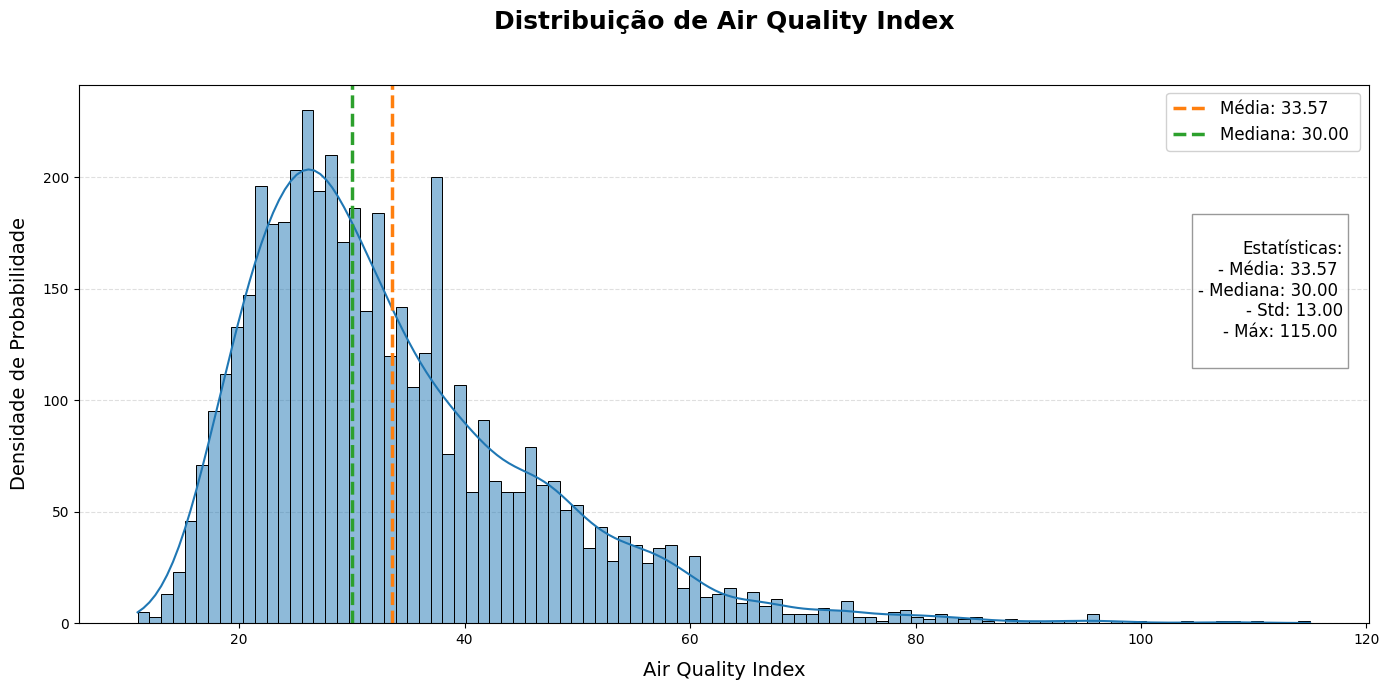

In [ ]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='aqi',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Air Quality Index\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Air Quality Index', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['aqi'].mean()
median_val = df_sensor['aqi'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} ')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} ')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f}
- Mediana: {median_val:.2f}
- Std: {df_sensor['aqi'].std():.2f}
- Máx: {df_sensor['aqi'].max():.2f}
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [ ]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['aqi'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'aqi'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'aqi'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'aqi'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para aqi: Estatística = 0.917, p-valor = 0.000
aqi NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 5.665535292001299e-23


In [ ]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.109, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 8.489114179880957e-11


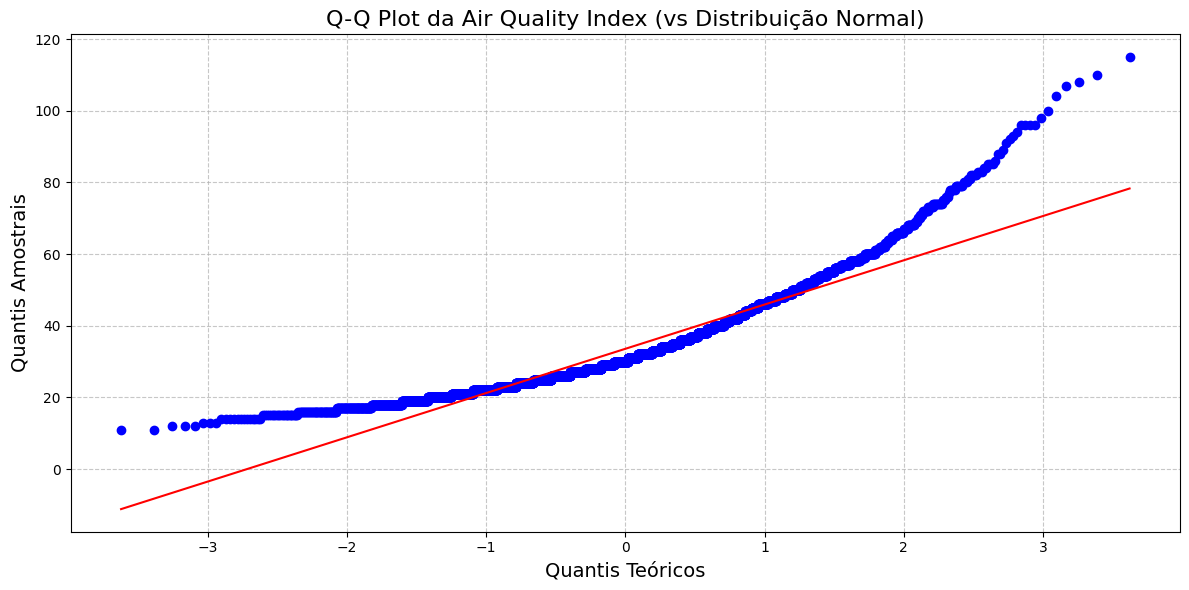

In [ ]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['aqi'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Air Quality Index (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [ ]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [ ]:
df_sensor['aqi_boxcox'] = np.nan

mask = (df_sensor['aqi'].notna())

aqi_validos = df_sensor.loc[mask, 'aqi']

aqi_boxcox, lambda_boxcox = stats.boxcox(aqi_validos + 1)

df_sensor.loc[mask, 'aqi_boxcox'] = aqi_boxcox

### Testes de normalidade após Boxcox



In [ ]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['aqi_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'aqi'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'aqi'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'aqi'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para aqi: Estatística = 0.995, p-valor = 0.002
aqi NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 0.0016112594605782646


In [ ]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.035, p-valor = 0.158
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.15846216638381894


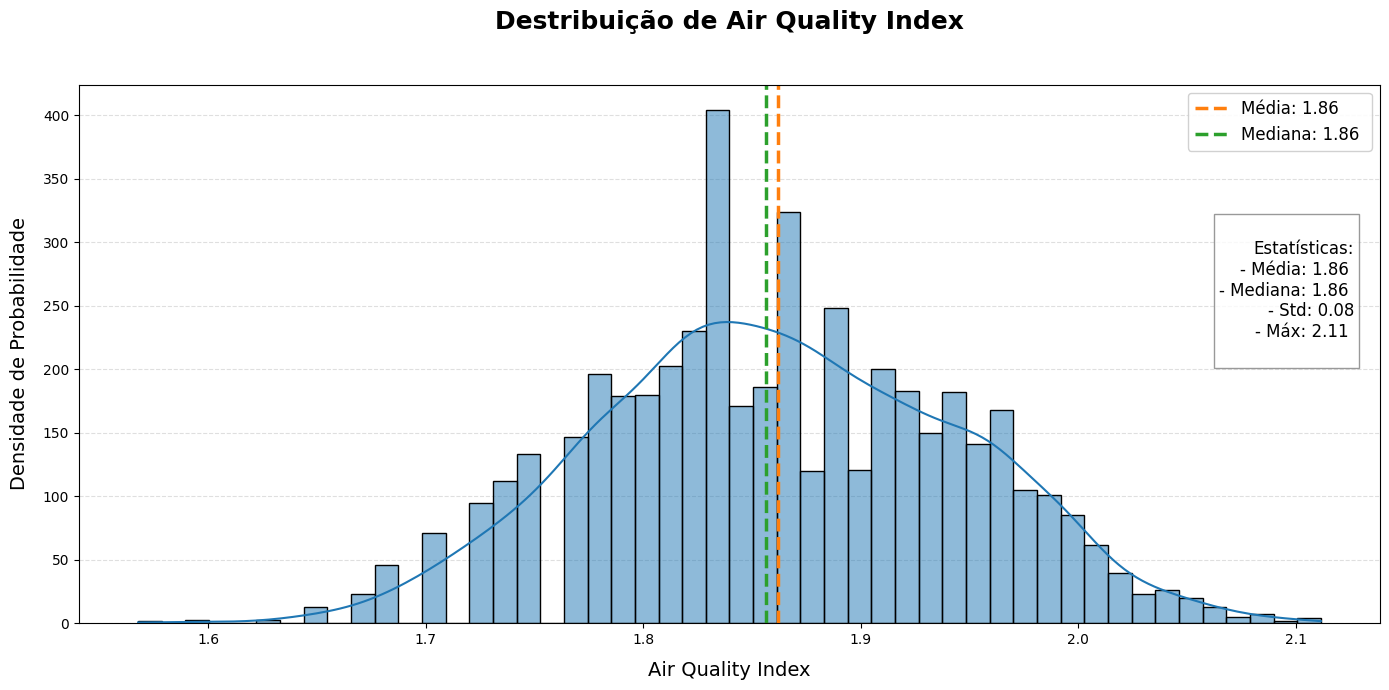

In [ ]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='aqi_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de Air Quality Index\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Air Quality Index', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['aqi_boxcox'].mean()
median_val = df_sensor['aqi_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} ')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} ')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f}
- Mediana: {median_val:.2f}
- Std: {df_sensor["aqi_boxcox"].std():.2f}
- Máx: {df_sensor["aqi_boxcox"].max():.2f}
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

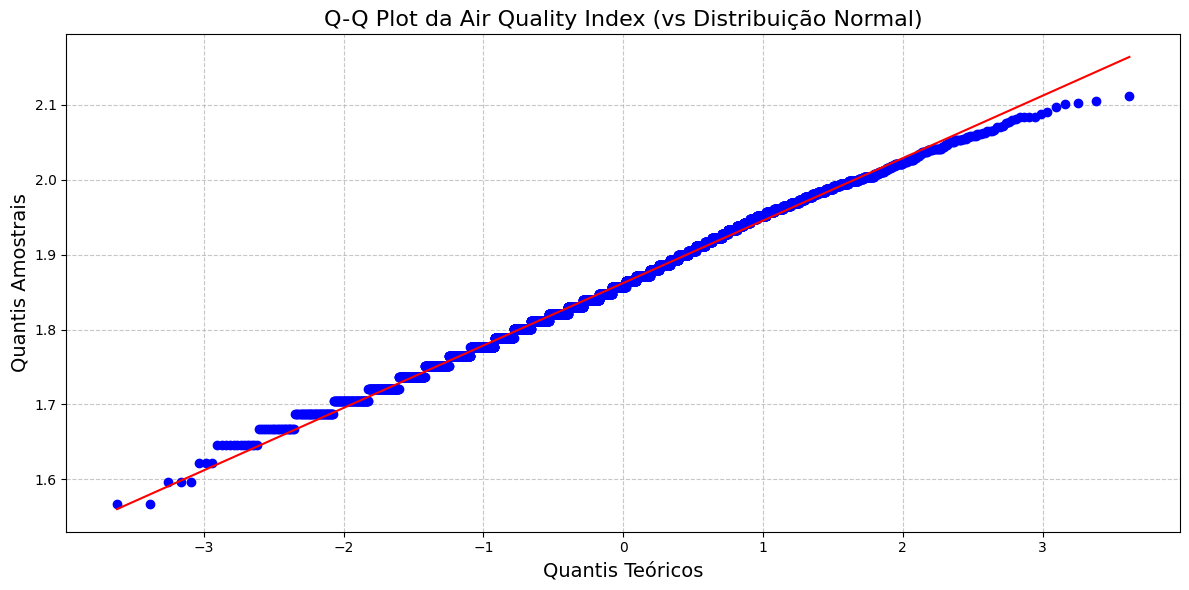

In [ ]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['aqi_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Air Quality Index (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna AQI

In [ ]:
#@title Dropando colunas aqi e renomeando 'aqi_boxcox' para aqi

df_sensor.drop(columns=['aqi'], inplace=True)
df_sensor.rename(columns={'aqi_boxcox': 'aqi'}, inplace=True)

## Gerando CSV de saída com as medições com o Boxcox aplicado


In [155]:
df_sensor

data_formatada   ano  mes  aqi classificacao     chuva       temp  \
0        2012-01-01  2012    1   21      N1 - Boa  0.125360  20.699503   
1        2012-01-02  2012    1   17      N1 - Boa  0.129591  18.477454   
2        2012-01-03  2012    1   21      N1 - Boa  0.001037  20.057651   
3        2012-01-04  2012    1   31      N1 - Boa  0.002065  20.826094   
4        2012-01-05  2012    1   33      N1 - Boa  0.000000  21.188042   
...             ...   ...  ...  ...           ...       ...        ...   
4745     2024-12-28  2024   12   30      N1 - Boa  0.116291  21.291794   
4746     2024-12-29  2024   12   26      N1 - Boa  0.001381  21.331915   
4747     2024-12-30  2024   12   23      N1 - Boa  0.087128  21.438760   
4748     2024-12-31  2024   12   32      N1 - Boa  0.000000  21.788007   
4749     2025-01-01  2025    1   23      N1 - Boa  0.000000  21.938113   

              ur        co        no       no2       nox       so2        o3  \
0     150.278928  0.215578  1.255933  4.167875  2.762548  1.469239  6.471631   
1     156.596995  0.181741  1.883802  4.400359  3.009492  1.130226  6.015490   
2     120.934225  0.165688  2.020305  4.492876  3.098142  1.849169  5.252830   
3     115.348552  0.170838  2.173895  5.072353  3.312328  1.617111  6.756880   
4     120.017455  0.169572  2.006521  4.821368  3.170513  1.598864  7.891867   
...          ...       ...       ...       ...       ...       ...       ...   
4745  144.918746  0.200541  1.681080  4.143157  2.858484  2.603619  8.993807   
4746  146.144100  0.208414  1.412755  3.538239  2.576710  2.136624  8.869292   
4747  139.919027  0.186359  1.773612  4.026527  2.860216  2.437662  8.206436   
4748  127.898053  0.148718  1.763220  3.913311  2.823849  2.133425  8.862802   
4749  131.333587  0.134145  1.275378  4.295977  2.810956  2.040782  6.935871   

          pm10     pm2_5  
0     3.008264  3.841279  
1     2.552152  2.241183  
2     3.014046  2.009550  
3     3.345294  3.972002  
4     3.275265  3.345935  
...        ...       ...  
4745  2.665946  1.950029  
4746  2.765536  1.812048  
4747  2.802068  1.837907  
4748  3.056801  2.954192  
4749  3.164723  3.041059  

[4750 rows x 16 columns]

In [170]:
df_sensor.to_csv('rio_de_janeiro_sensores_boxcox', index=False)